In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('./data/final_data_after_winsorization.csv', index_col='행정동명')
data.fillna(0, inplace=True)
data.head(2)

2023년09월_전체세대  2023년09월_1인세대  2023년09월_2인세대  2023년09월_3인세대  \
행정동명                                                               
가락1동           9836           1633           2492           2706   
가락2동          12375           3568           2746           2825   

      2023년09월_4인세대  2023년09월_5인세대  2023년9월_6인가구이상  채소가게수  제로웨이스트 가게수  유치원수  \
행정동명                                                                          
가락1동           2438            449             118   10.0         0.0   1.0   
가락2동           2641            453             142    3.0         0.0   4.0   

      ...  총_20_30대_(수)  총_40_50대_(수)  총_60대이상_(수)     총_10대  총_20_30대  \
행정동명  ...                                                                
가락1동  ...         15010         17080        11642  0.095664  0.272572   
가락2동  ...         17364         20426        14158  0.104766  0.277141   

      총_40_50대   총_60대이상  유치원_초등학교_(수)  유치원_초등학교  거주_유동_인구당_매출액  
행정동명                                                             
가락1동  0.310162  0.211411           3.0  0.000054      26.850496  
가락2동  0.326013  0.225971           6.0  0.000096      35.834189  

[2 rows x 63 columns]

In [3]:
features = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대']
data = data[features]
print(f'사용하는 컬럼수: {len(features)}개')

사용하는 컬럼수: 14개


## 스케일링

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data))
scaled_df.index = data.index
scaled_df.columns = data.columns
scaled_df.head(2)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                         
가락1동  0.014204  0.076923          0.0       0.025989  0.116279         0.0   
가락2동  0.014204  0.346154          0.0       0.035016  0.034884         0.0   

      승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                   
가락1동      0.085682  0.105911  0.125300  0.639775  0.426207  0.408414   
가락2동      0.088504  0.182266  0.220257  0.745585  0.466991  0.415310   

       총_60대이상      1인세대  
행정동명                      
가락1동  0.457904  0.112284  
가락2동  0.489702  0.269226

## PCA
- https://www.statology.org/scree-plot-python/

In [5]:
# 주성분
# 주성분 = 특성들의 값을 곱하여 만들어진 축
# 주성분 하나의 각각의 특성들에 곱해지는 값은 가중치(중요도)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80)
pca.fit(scaled_df)
pca_result = pd.DataFrame((pca.transform(scaled_df)))

num_of_principal = pca_result.shape[1] 
print('주성분의 개수:', num_of_principal)
print(pca.explained_variance_ratio_)
pca_result.index = data.index
pca_result.head(2)

주성분의 개수: 6
[0.30314721 0.24872725 0.11136909 0.07746297 0.05712224 0.04575501]


0         1         2         3         4         5
행정동명                                                            
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808

scree plot

In [7]:
pca.n_components_

6

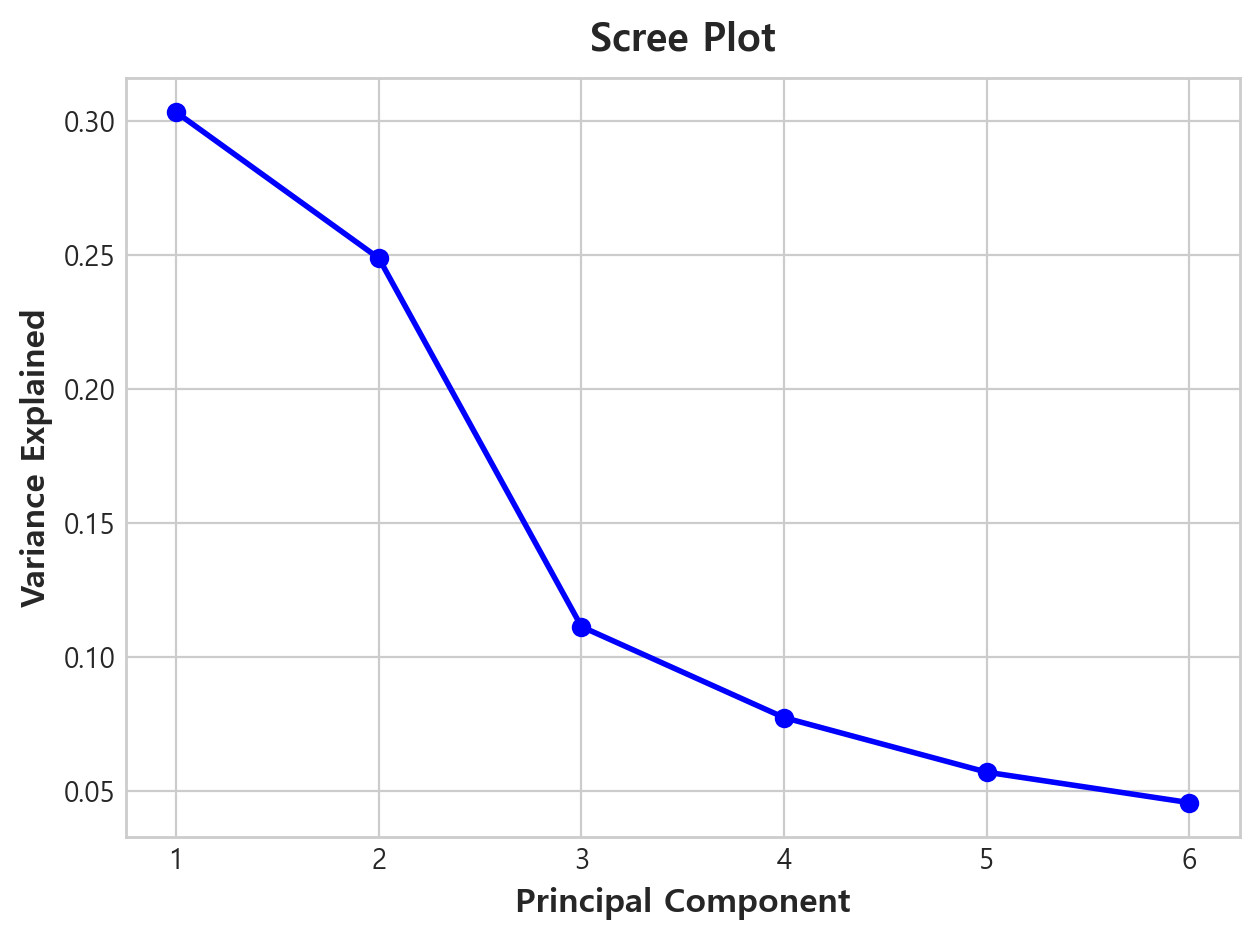

In [8]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [9]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])

주성분의 설명력
제 1주성분 : 0.3031472103177469
제 2주성분 : 0.24872724867827828
제 3주성분 : 0.11136909342828541
제 4주성분 : 0.07746296789446064
제 5주성분 : 0.057122236866911584
제 6주성분 : 0.04575500769808147


In [10]:
pca_result_T = pca_result.reset_index().copy()
pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]
pca_result_T.columns

Index(['V_행정동명', 'V_0', 'V_1', 'V_2', 'V_3', 'V_4', 'V_5'], dtype='object')

<Axes: xlabel='V_0', ylabel='V_1'>

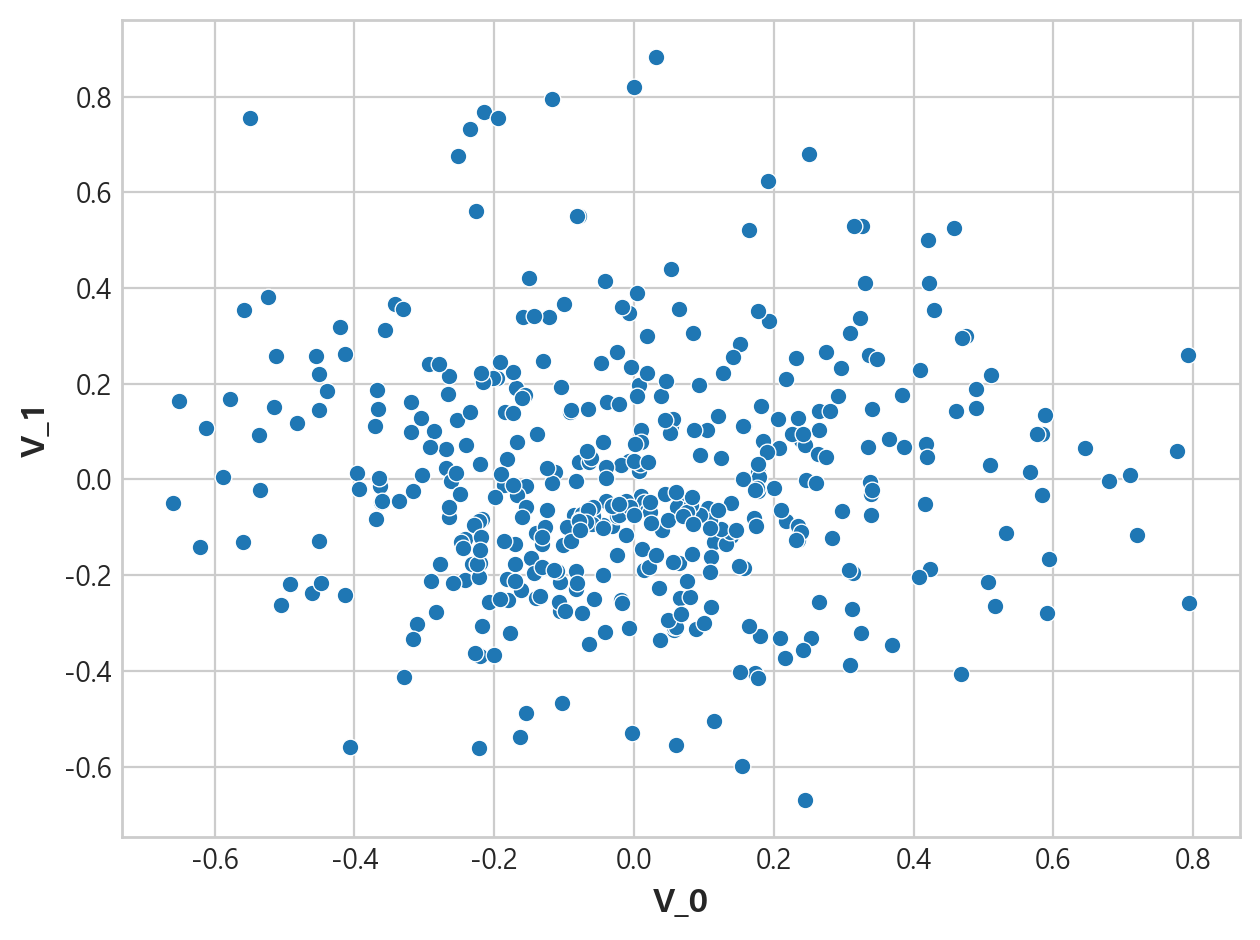

In [11]:
import seaborn as sns
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1')

In [12]:
pca_result_T.sort_values('V_0').head(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
394           필동 -0.660355 -0.048411  0.392070  0.419604 -0.405873 -0.258607
312         을지로동 -0.651767  0.163756  0.220484 -0.109212 -0.054113  0.107380
91          둔촌1동 -0.621720 -0.141444  0.188045 -0.126260 -0.362875  0.062102
3           가리봉동 -0.612605  0.107408 -0.156476  0.051506 -0.025351 -0.021620
345          장충동 -0.588089  0.006152  0.046064  0.049316 -0.261756 -0.098729
355      종로5.6가동 -0.578160  0.168944  0.107180  0.136420 -0.083988 -0.061397
376         창신1동 -0.560045 -0.131278 -0.074370  0.290240 -0.024362 -0.121399
30           광희동 -0.557756  0.354156  0.122425 -0.089660  0.216152  0.137628
354  종로1.2.3.4가동 -0.549133  0.754336  1.115468  0.628705  0.727712 -0.291113
239          신당동 -0.536105  0.093052 -0.034269  0.033063 -0.062439 -0.028168

In [13]:
pca_result_T.sort_values('V_0').tail(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
27    공릉2동  0.587460  0.135497  0.110950  0.127214 -0.214893 -0.048784
332   잠실2동  0.591298 -0.279213  0.125718 -0.294675 -0.033904 -0.133076
46    길음1동  0.594345 -0.167067  0.168555  0.002972 -0.079718 -0.082798
141   방화1동  0.645798  0.065415  0.031344  0.130048 -0.090087  0.134765
302   우장산동  0.679094 -0.004029  0.031780 -0.059384 -0.016090 -0.015123
259   신정3동  0.710345  0.008414  0.075882  0.230704 -0.110123  0.055720
310    위례동  0.719739 -0.116289  0.153284 -0.205296 -0.109415 -0.144933
370    진관동  0.776705  0.060339  0.292117  0.258947 -0.075628  0.045717
275   양재1동  0.793389  0.260735  0.365653  0.408048 -0.068085  0.375711
116    목5동  0.794465 -0.258356  0.223936 -0.020476 -0.151098 -0.074822

In [14]:
pca_result_T.sort_values('V_1').head(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
72    대치1동  0.244730 -0.669822  0.401472 -0.193157  0.023805  0.081461
126   반포2동  0.154866 -0.598937  0.253340 -0.245032 -0.036020 -0.043987
111   명일2동 -0.221879 -0.561661  0.410790  0.097726 -0.351088 -0.127095
15    개포1동 -0.406954 -0.559747  0.268320 -0.067676 -0.161930  0.055800
21    고덕1동  0.060718 -0.554496  0.201624 -0.070921 -0.069312 -0.002494
336   잠실7동 -0.163287 -0.537135  0.061103  0.013403  0.028082 -0.032317
327   일원본동 -0.002148 -0.529100  0.347970  0.024587 -0.169427  0.108888
292    오륜동  0.115086 -0.505157  0.225405 -0.125293  0.023162 -0.077241
117    무악동 -0.155221 -0.487748  0.067484 -0.054434  0.048791 -0.002680
272   암사3동 -0.103116 -0.466800  0.073392 -0.183124  0.081611  0.151633

In [15]:
pca_result_T.sort_values('V_1').tail(10)

V_행정동명       V_0       V_1       V_2       V_3       V_4       V_5
386          청룡동  0.191352  0.623837 -0.121172 -0.082242 -0.270960  0.042787
417          화양동 -0.251832  0.675537  0.019692 -0.315194 -0.301797 -0.067263
5           가양1동  0.250883  0.679489  0.192243 -0.057842 -0.158608  0.190651
243          신림동 -0.234859  0.731466 -0.128165 -0.346779 -0.269404  0.029122
354  종로1.2.3.4가동 -0.549133  0.754336  1.115468  0.628705  0.727712 -0.291113
280         역삼1동 -0.194931  0.755175  0.482299 -0.159764  0.119474 -0.021548
263          신촌동 -0.214869  0.766856  0.429921 -0.092462 -0.134007 -0.167616
4            가산동 -0.117360  0.795470  0.181084 -0.224243  0.009892 -0.060995
287         영등포동 -0.000651  0.819616  0.225447 -0.078702 -0.021299 -0.154315
189          서교동  0.031945  0.882373  0.650519 -0.093045  0.266645 -0.126773

### interpret PCA
https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html  

create loading

In [16]:
# pd.DataFrame(data=pca.components_, columns=scaled_df.columns).T #아래 코드와 동일한 결과 산출

loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1, num_of_principal+1)], index=data.columns)
loadings

PC1       PC2       PC3       PC4       PC5       PC6
미세먼지지수        -0.080590  0.094684  0.296722  0.087117  0.180117 -0.035903
공원수            0.271876  0.090130  0.215702  0.394975 -0.108064  0.799328
도시농업(프로그램수)    0.001329  0.056105  0.146875  0.132258  0.185270 -0.040614
거주_유동_인구당_매출액 -0.110020 -0.060351  0.260936 -0.199340 -0.162421  0.239050
채소가게수          0.009614  0.053731 -0.037048  0.054166  0.052658 -0.034021
제로웨이스트 가게수    -0.008139  0.057883  0.131611  0.039677  0.107375  0.069813
승하차인원_버스_지하철   0.082841  0.304039  0.417959  0.065134  0.371241 -0.275890
카페수            0.026723  0.285493  0.453133 -0.073693  0.211609 -0.044682
유치원_초등학교      -0.094357 -0.190817  0.346881  0.567748 -0.588320 -0.394278
인구수            0.808800  0.349410 -0.205978  0.054206 -0.170197 -0.214050
총_10대          0.299987 -0.334617  0.291244 -0.238621 -0.029185 -0.080464
총_20_30대      -0.088528  0.380717 -0.073748 -0.187551 -0.316336 -0.044626
총_60대이상       -0.050975 -0.066690 -0.337885  0.583311  0.426247 -0.071577
1인세대          -0.369133  0.613252 -0.099368  0.085746 -0.201446  0.044573

loading plot

In [17]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

In [18]:
# # PCA가 2개일 때, 유요한 코드 - loading_plot
# fig, ax = plt.subplots(figsize = (5,5))
# ax[0] = loading_plot(pca.components_.T, data.columns)

loading matrix
- 방법 1

In [19]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(1, num_of_principal+1)], index=data.columns)
loading_matrix

PC1       PC2       PC3       PC4       PC5       PC6
미세먼지지수        -0.021819  0.023220  0.048693  0.011923  0.021168 -0.003776
공원수            0.073609  0.022104  0.035397  0.054056 -0.012700  0.084077
도시농업(프로그램수)    0.000360  0.013759  0.024102  0.018101  0.021774 -0.004272
거주_유동_인구당_매출액 -0.029787 -0.014801  0.042820 -0.027282 -0.019089  0.025144
채소가게수          0.002603  0.013177 -0.006080  0.007413  0.006189 -0.003578
제로웨이스트 가게수    -0.002204  0.014195  0.021598  0.005430  0.012619  0.007343
승하차인원_버스_지하철   0.022429  0.074563  0.068588  0.008914  0.043630 -0.029019
카페수            0.007235  0.070014  0.074360 -0.010086  0.024869 -0.004700
유치원_초등학교      -0.025547 -0.046796  0.056924  0.077702 -0.069143 -0.041472
인구수            0.218977  0.085689 -0.033801  0.007419 -0.020003 -0.022515
총_10대          0.081219 -0.082062  0.047794 -0.032658 -0.003430 -0.008464
총_20_30대      -0.023968  0.093367 -0.012102 -0.025668 -0.037178 -0.004694
총_60대이상       -0.013801 -0.016355 -0.055448  0.079832  0.050095 -0.007529
1인세대          -0.099940  0.150394 -0.016306  0.011735 -0.023675  0.004688

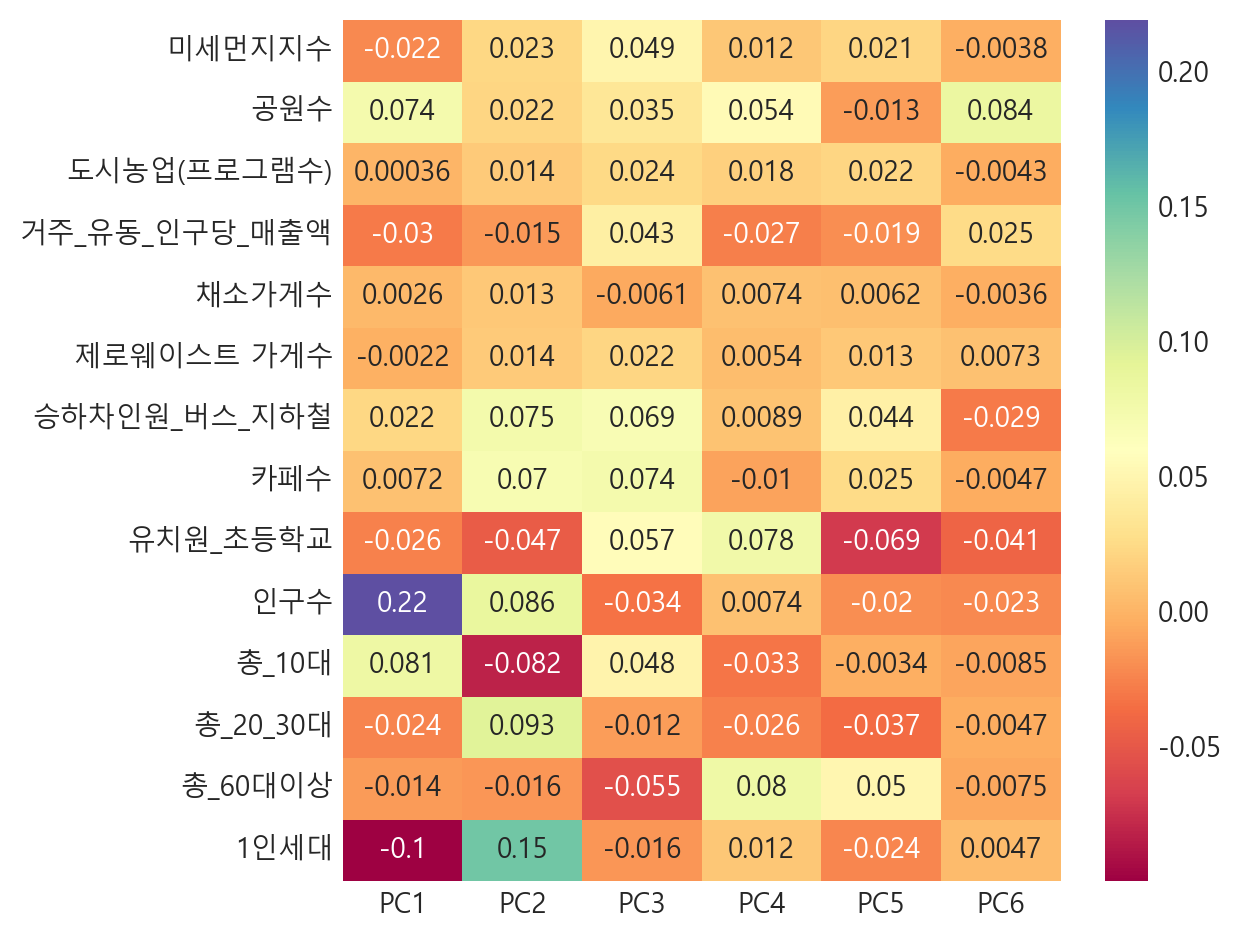

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loading_matrix, annot=True, cmap='Spectral')
plt.show()

- 방법 2

In [21]:
loadings_2 = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings_2)))
loadings_df['variable'] = data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6
variable                                                                 
미세먼지지수        -0.080590  0.094684  0.296722  0.087117  0.180117 -0.035903
공원수            0.271876  0.090130  0.215702  0.394975 -0.108064  0.799328
도시농업(프로그램수)    0.001329  0.056105  0.146875  0.132258  0.185270 -0.040614
거주_유동_인구당_매출액 -0.110020 -0.060351  0.260936 -0.199340 -0.162421  0.239050
채소가게수          0.009614  0.053731 -0.037048  0.054166  0.052658 -0.034021
제로웨이스트 가게수    -0.008139  0.057883  0.131611  0.039677  0.107375  0.069813
승하차인원_버스_지하철   0.082841  0.304039  0.417959  0.065134  0.371241 -0.275890
카페수            0.026723  0.285493  0.453133 -0.073693  0.211609 -0.044682
유치원_초등학교      -0.094357 -0.190817  0.346881  0.567748 -0.588320 -0.394278
인구수            0.808800  0.349410 -0.205978  0.054206 -0.170197 -0.214050
총_10대          0.299987 -0.334617  0.291244 -0.238621 -0.029185 -0.080464
총_20_30대      -0.088528  0.380717 -0.073748 -0.187551 -0.316336 -0.044626
총_60대이상       -0.050975 -0.066690 -0.337885  0.583311  0.426247 -0.071577
1인세대          -0.369133  0.613252 -0.099368  0.085746 -0.201446  0.044573

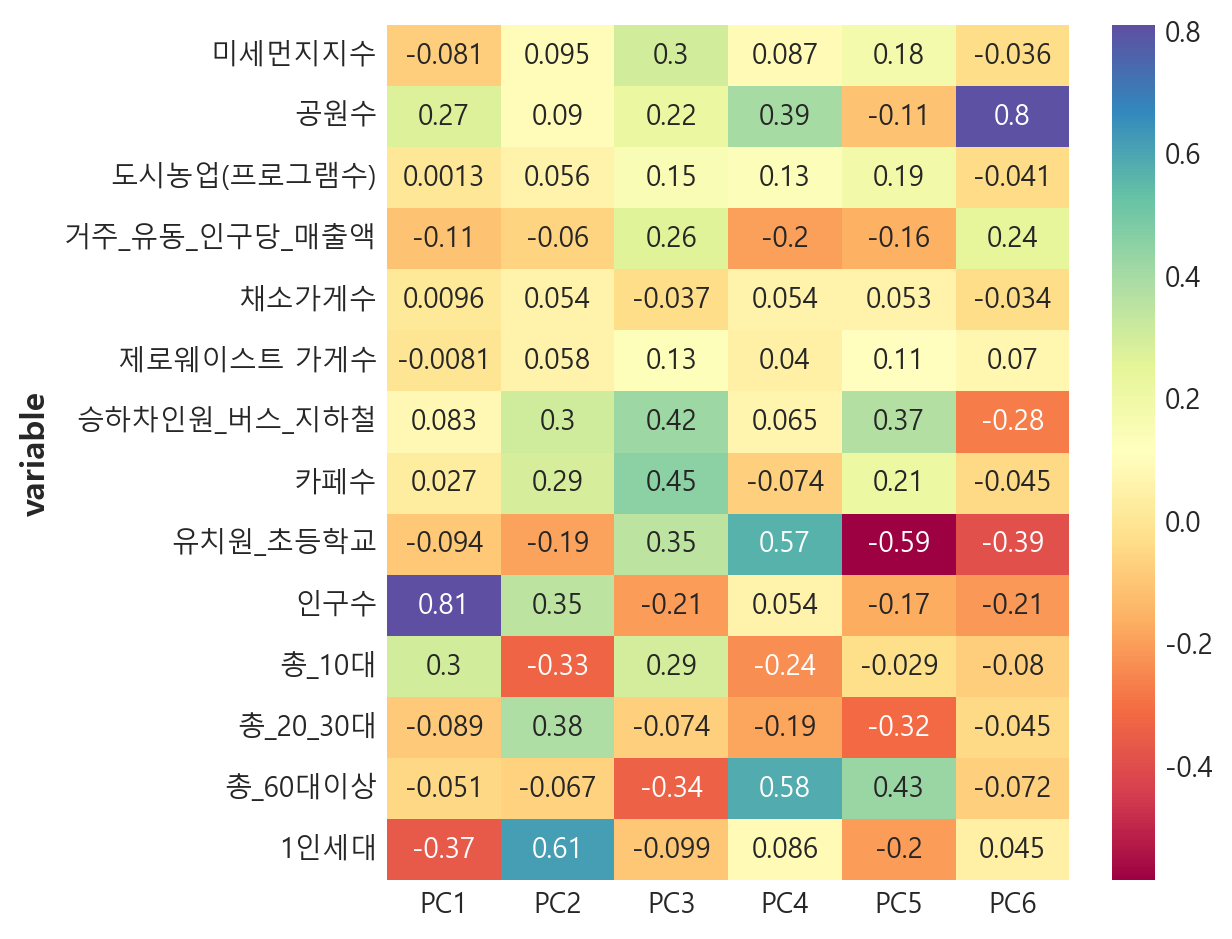

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

## clustering

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

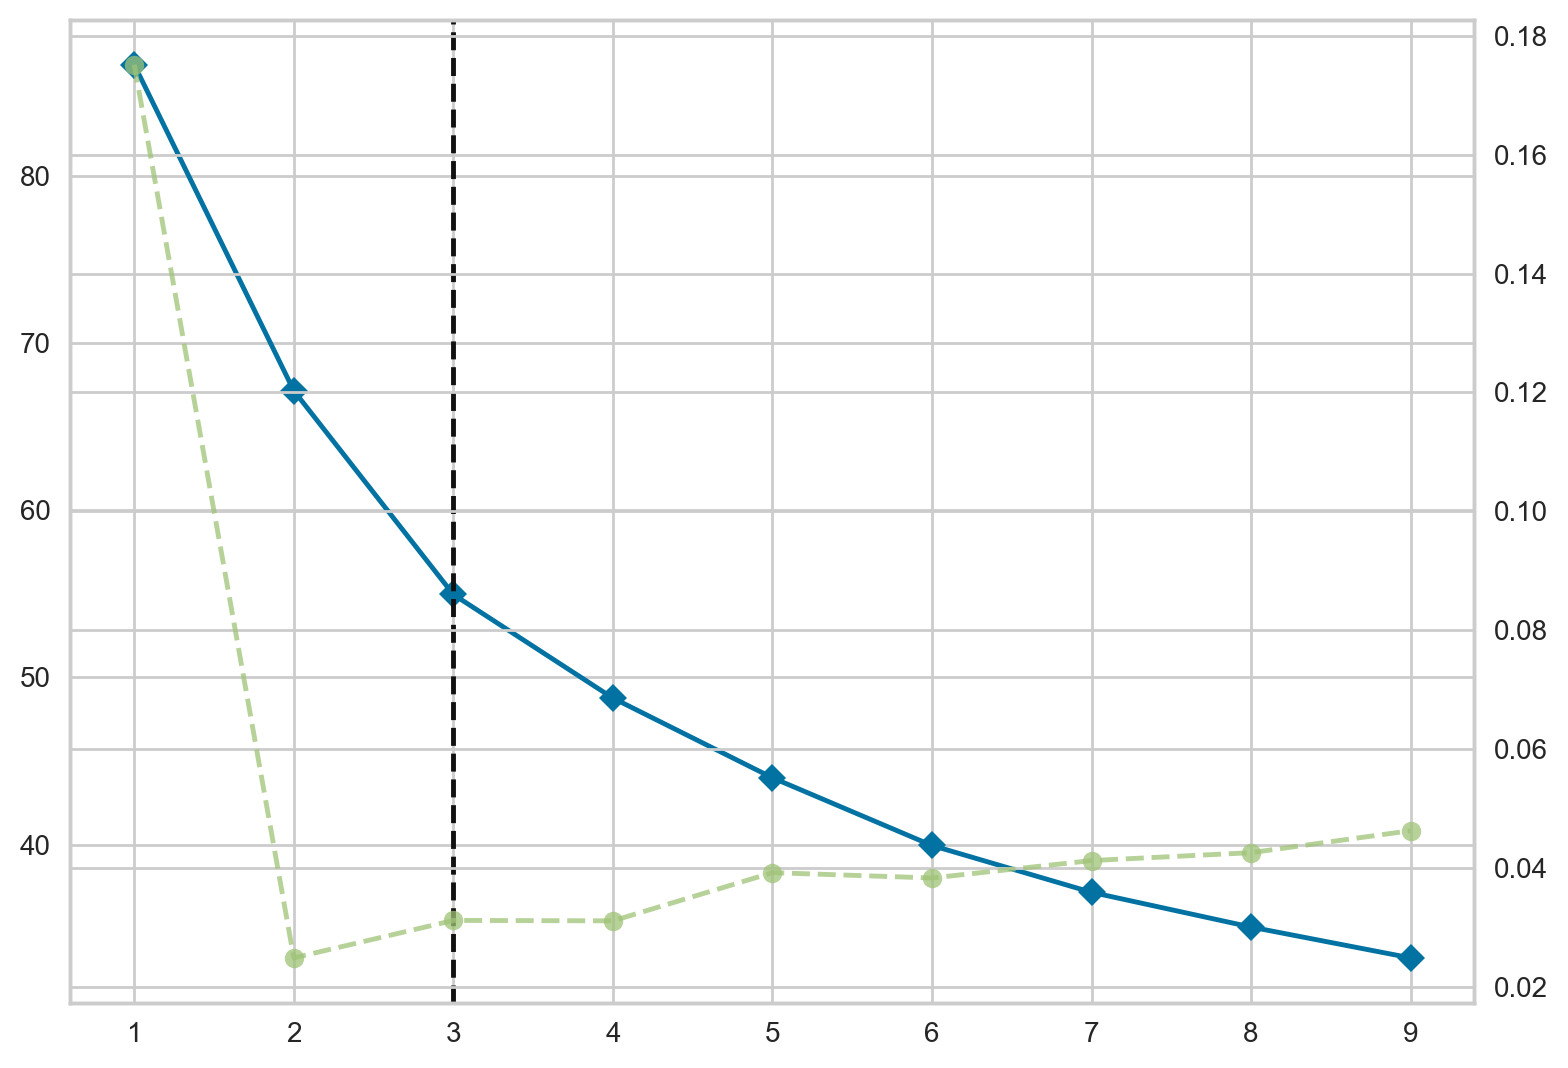

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score


#엘보우 최적 클러스터 수 정하기
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10), n_init=10)
visualizer.fit(pca_result)

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [25]:
def silhouette_avg(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    return cluster_labels, yticks, silhoutte_avg

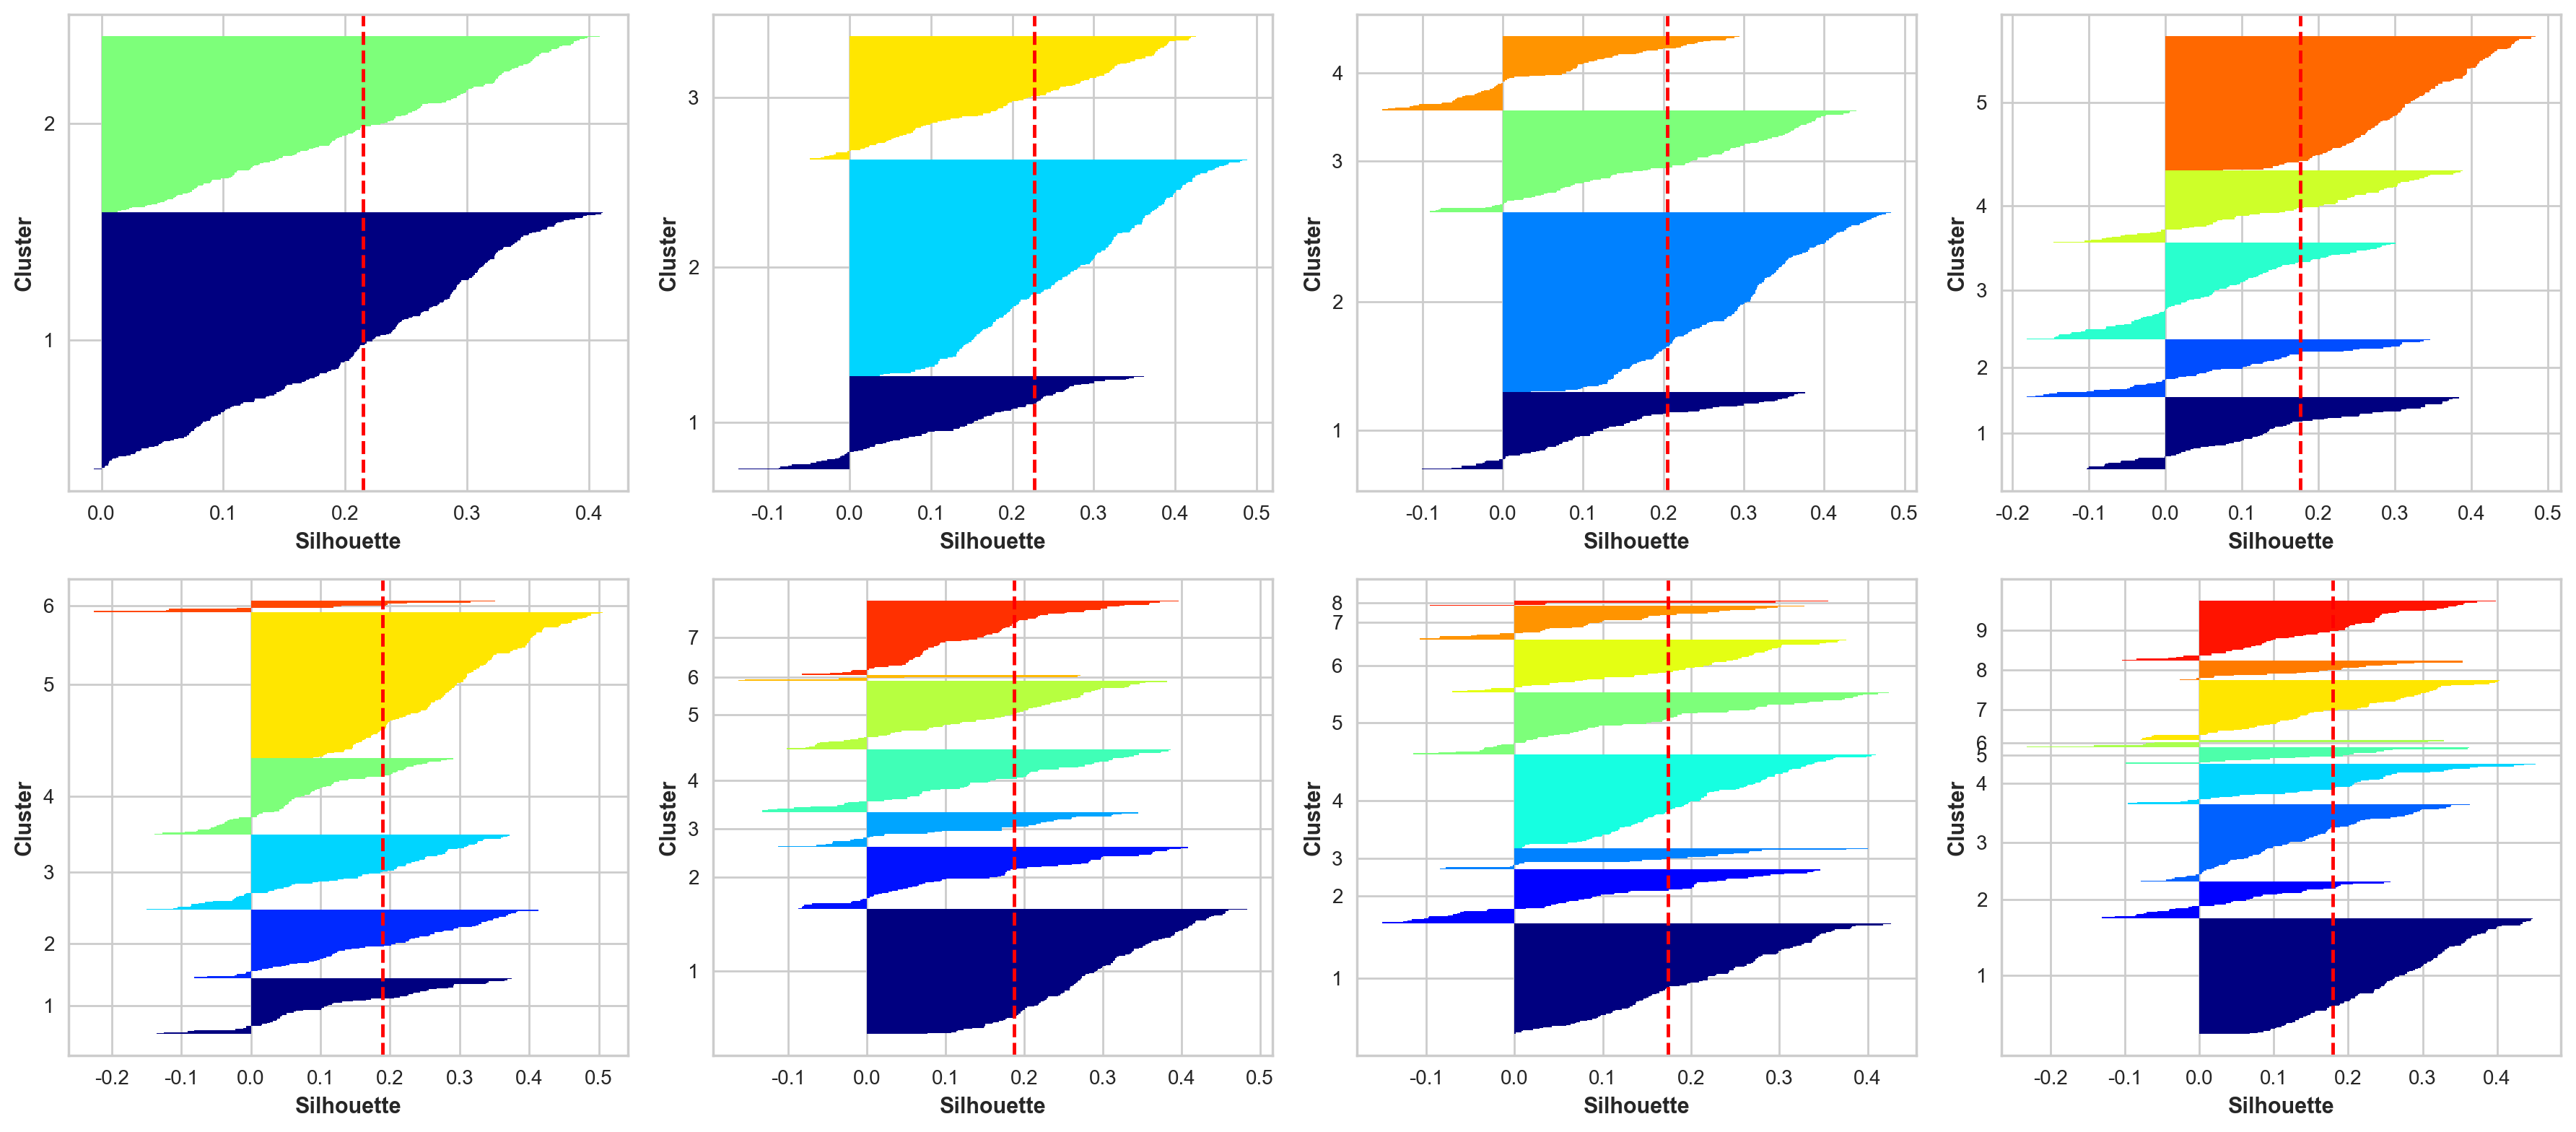

In [26]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(18,8))
for i, n_cluster in enumerate(n_clusters):
    kmeans= KMeans(n_clusters=n_cluster,
                   n_init=10,
                    init='k-means++',
                    max_iter=300,
                    random_state=0)
    kmeans.fit(pca_result)

    
    plt.subplot(nrows, ncols, i+1)
    cluster_labels, yticks, silhoutte_score = silhouette_avg(pca_result, kmeans.labels_)
    
    plt.axvline(silhoutte_score, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette')
    
plt.show()

In [27]:
pca_result.head(2)

0         1         2         3         4         5
행정동명                                                            
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


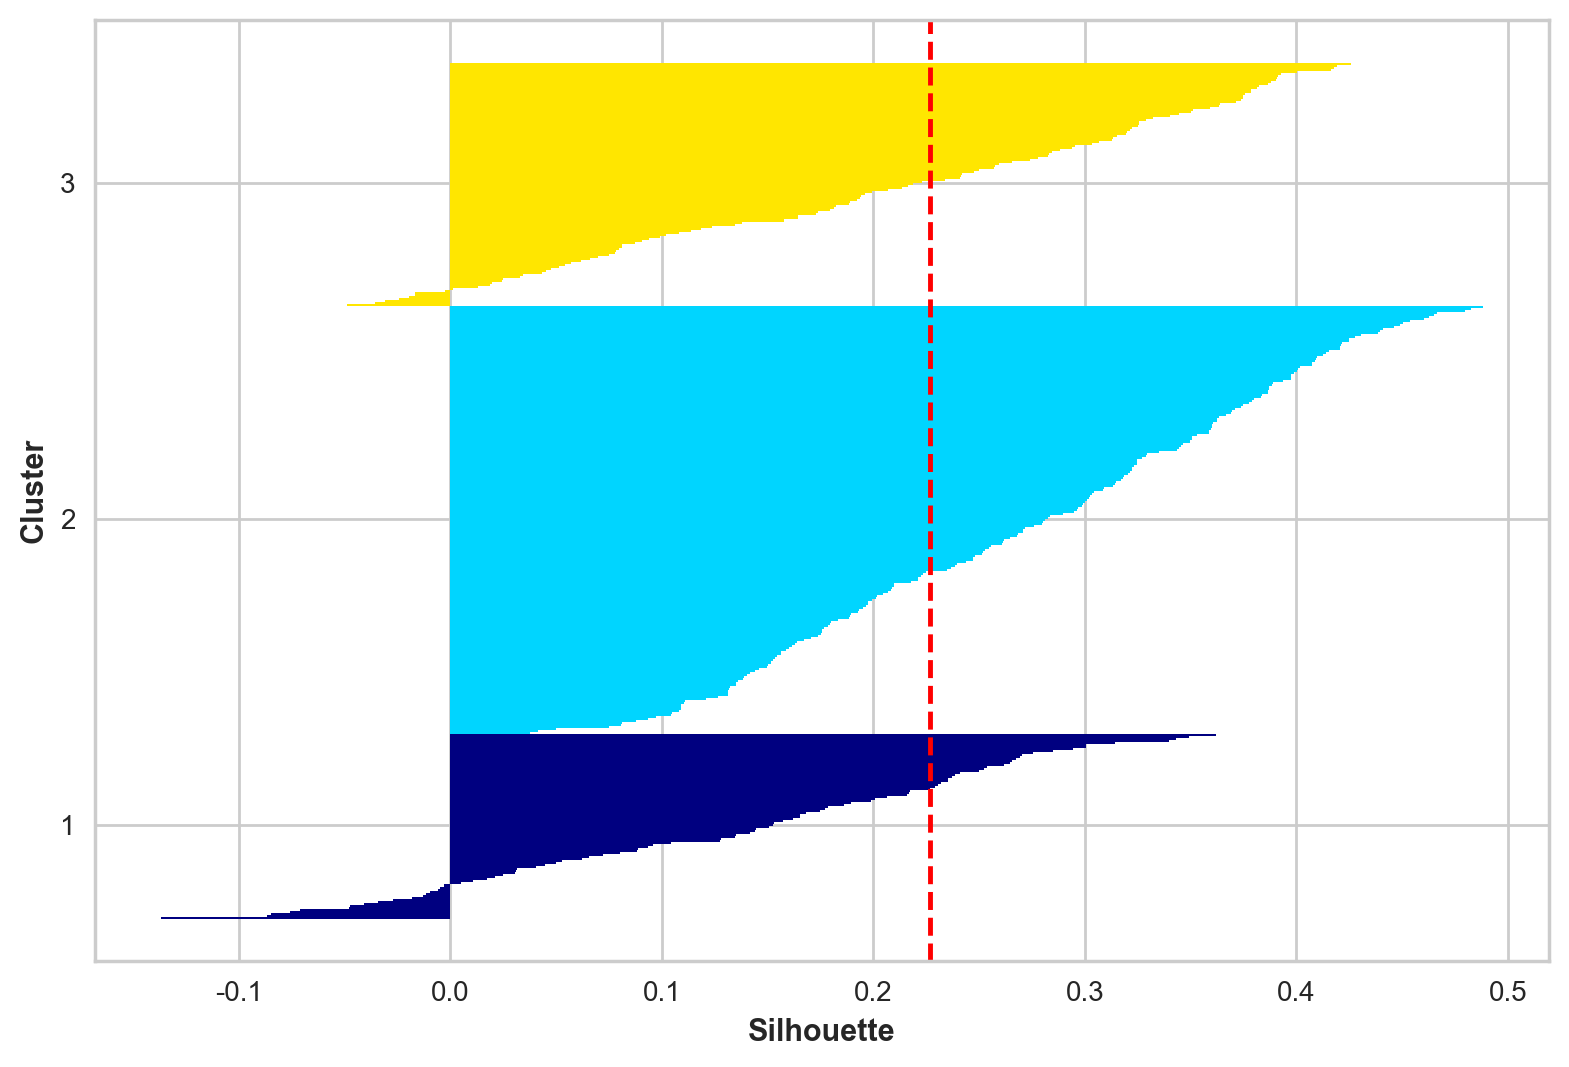

In [28]:
kmeans = KMeans(n_clusters=3,      
                init='k-means++',   # K-means 알고리즘 설정
                max_iter=300,       # 최대 몇번 반복 
                random_state=0)

y_km = kmeans.fit_predict(pca_result)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#실루엣 분석
silhouette_vals = silhouette_samples(pca_result, y_km, metric = 'euclidean')

#시각화
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels) :
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0,
             edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

#라벨링
pca_result['cluster'] = kmeans.labels_
#실루엣계수 평균값
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color = 'red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette')

plt.tight_layout()
plt.show()

In [29]:
pca_result.head(3)

0         1         2         3         4         5  cluster
행정동명                                                                     
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174        2
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808        2
가락본동  0.156997  0.112429  0.042758  0.028743 -0.027314  0.151885        2

In [30]:
for i in range(4):
    print(f"cluster_{i}의 개수: {len(pca_result[pca_result['cluster'] == i].index)}개")

cluster_0의 개수: 92개
cluster_1의 개수: 213개
cluster_2의 개수: 121개
cluster_3의 개수: 0개


In [31]:
pca_result

0         1         2         3         4         5  cluster
행정동명                                                                     
가락1동  0.313751 -0.194982 -0.059432 -0.178299  0.034524 -0.083174        2
가락2동  0.416137 -0.051024  0.035967 -0.002984 -0.078425  0.073808        2
가락본동  0.156997  0.112429  0.042758  0.028743 -0.027314  0.151885        2
가리봉동 -0.612605  0.107408 -0.156476  0.051506 -0.025351 -0.021620        0
가산동  -0.117360  0.795470  0.181084 -0.224243  0.009892 -0.060995        0
...        ...       ...       ...       ...       ...       ...      ...
효창동  -0.220963 -0.147393 -0.076008 -0.179221  0.013815  0.064513        1
후암동  -0.173475 -0.012163 -0.079110 -0.033911 -0.037622 -0.009051        1
휘경1동 -0.266365  0.178560 -0.087341 -0.182468 -0.011273 -0.015696        0
휘경2동  0.044370  0.123468 -0.078969 -0.030306 -0.139292 -0.033905        2
흑석동   0.274764  0.047456  0.045378  0.099913 -0.081756 -0.093310        2

[426 rows x 7 columns]

<Axes: xlabel='V_0', ylabel='V_1'>

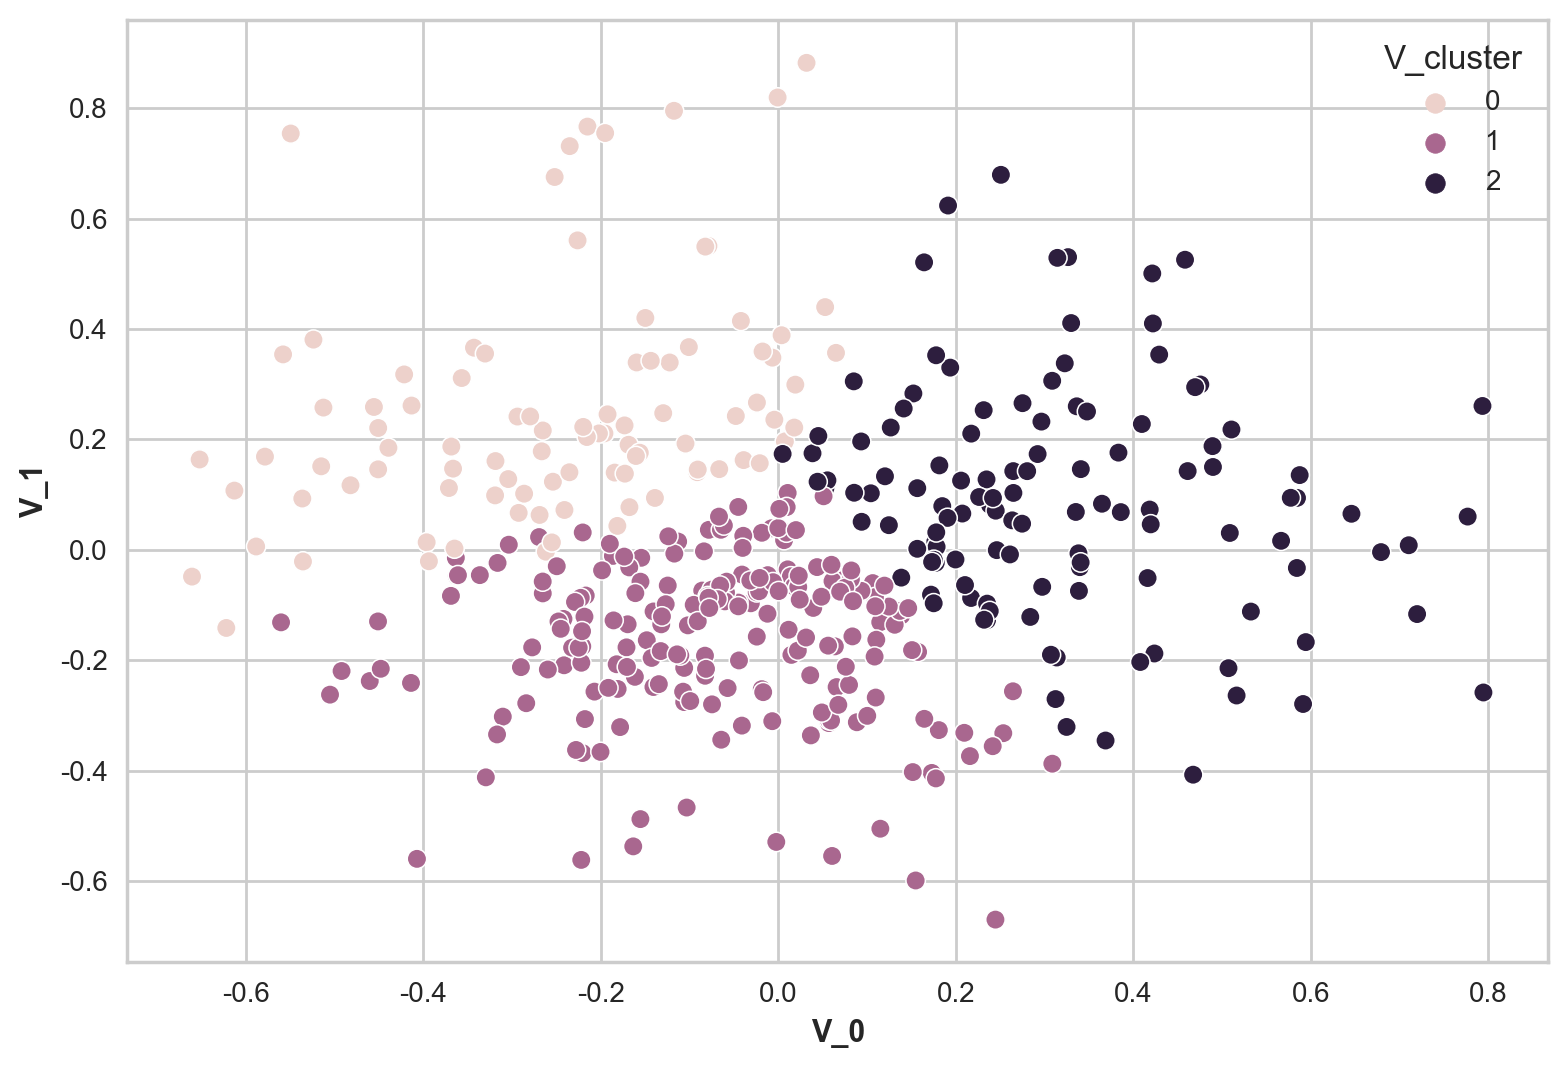

In [32]:
pca_result_T = pca_result.reset_index().copy()

pca_result_T.columns = ['V_' + str(x) for x in pca_result_T.columns]

sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_1', hue = 'V_cluster')

<Axes: xlabel='V_0', ylabel='V_2'>

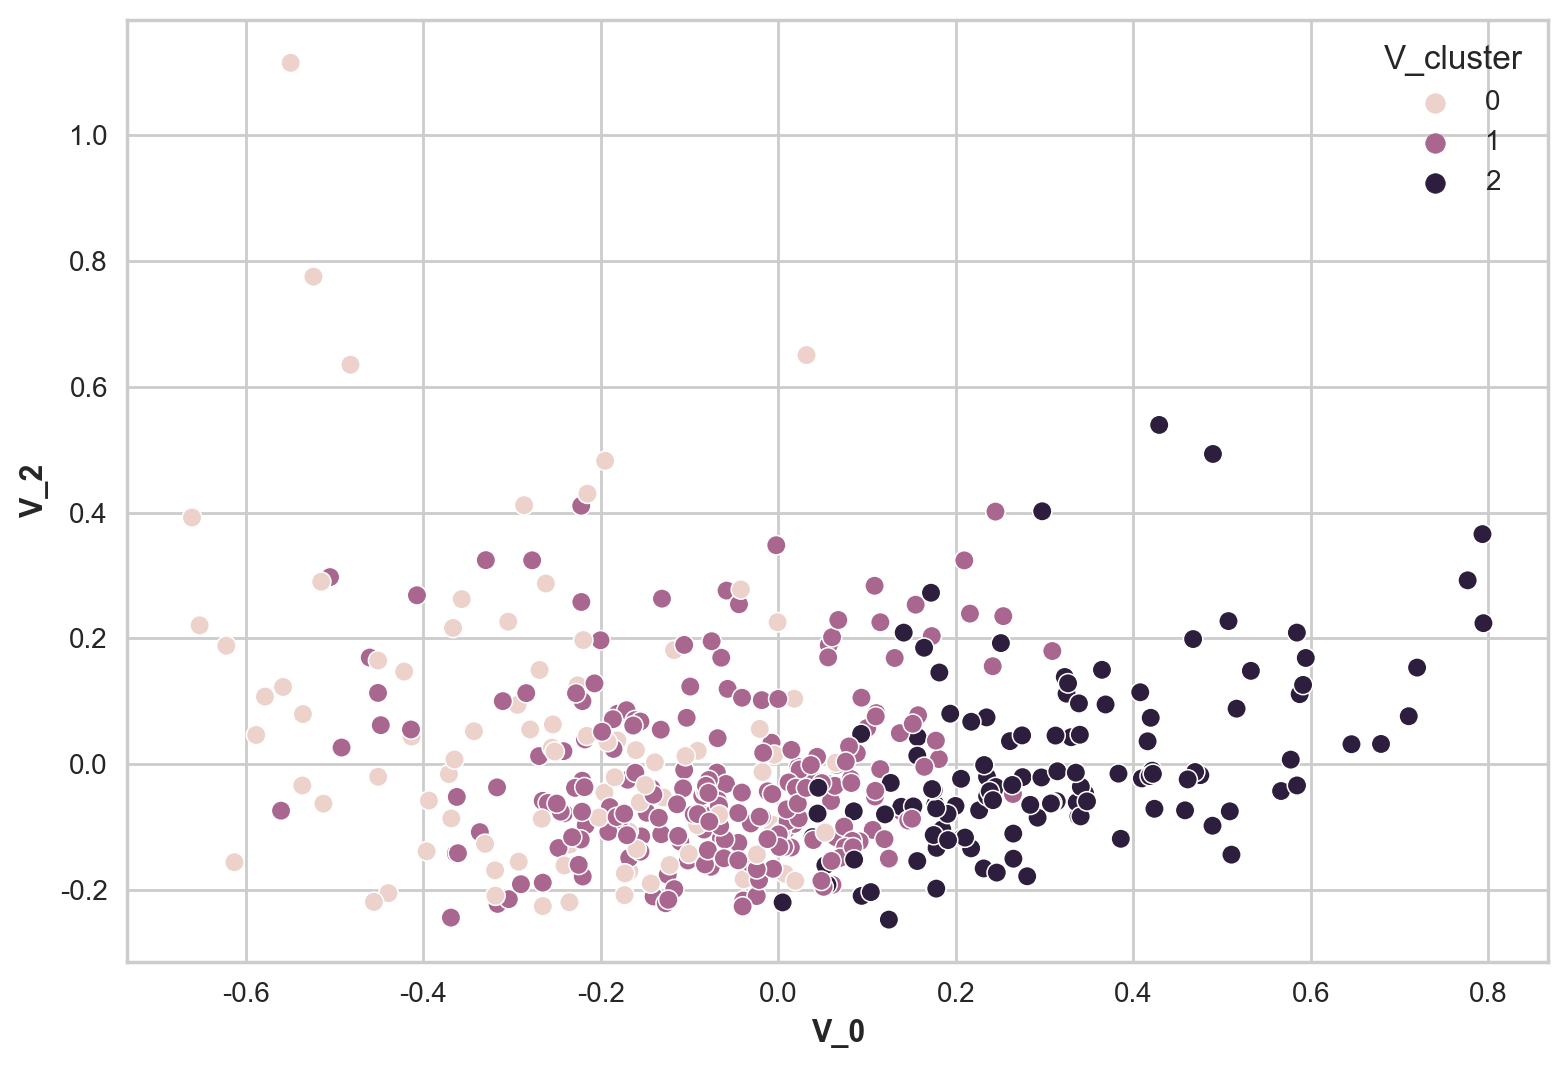

In [33]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_2', hue = 'V_cluster')

<Axes: xlabel='V_0', ylabel='V_3'>

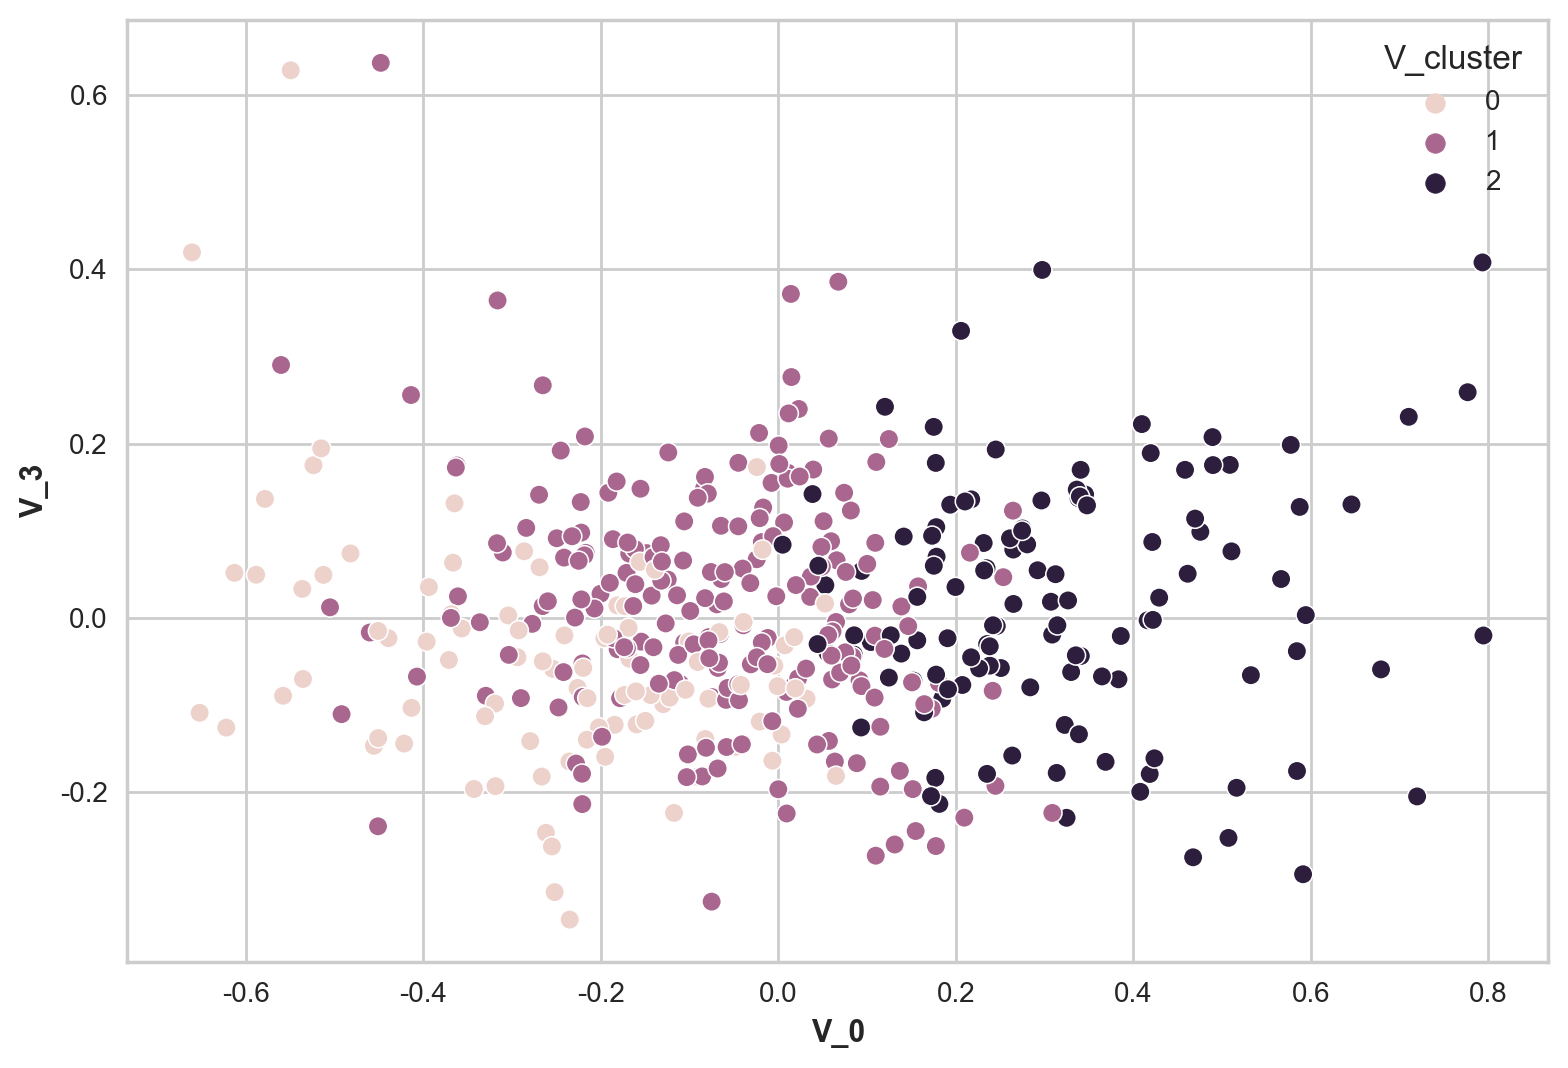

In [34]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_0', y = 'V_3', hue = 'V_cluster')

<Axes: xlabel='V_1', ylabel='V_2'>

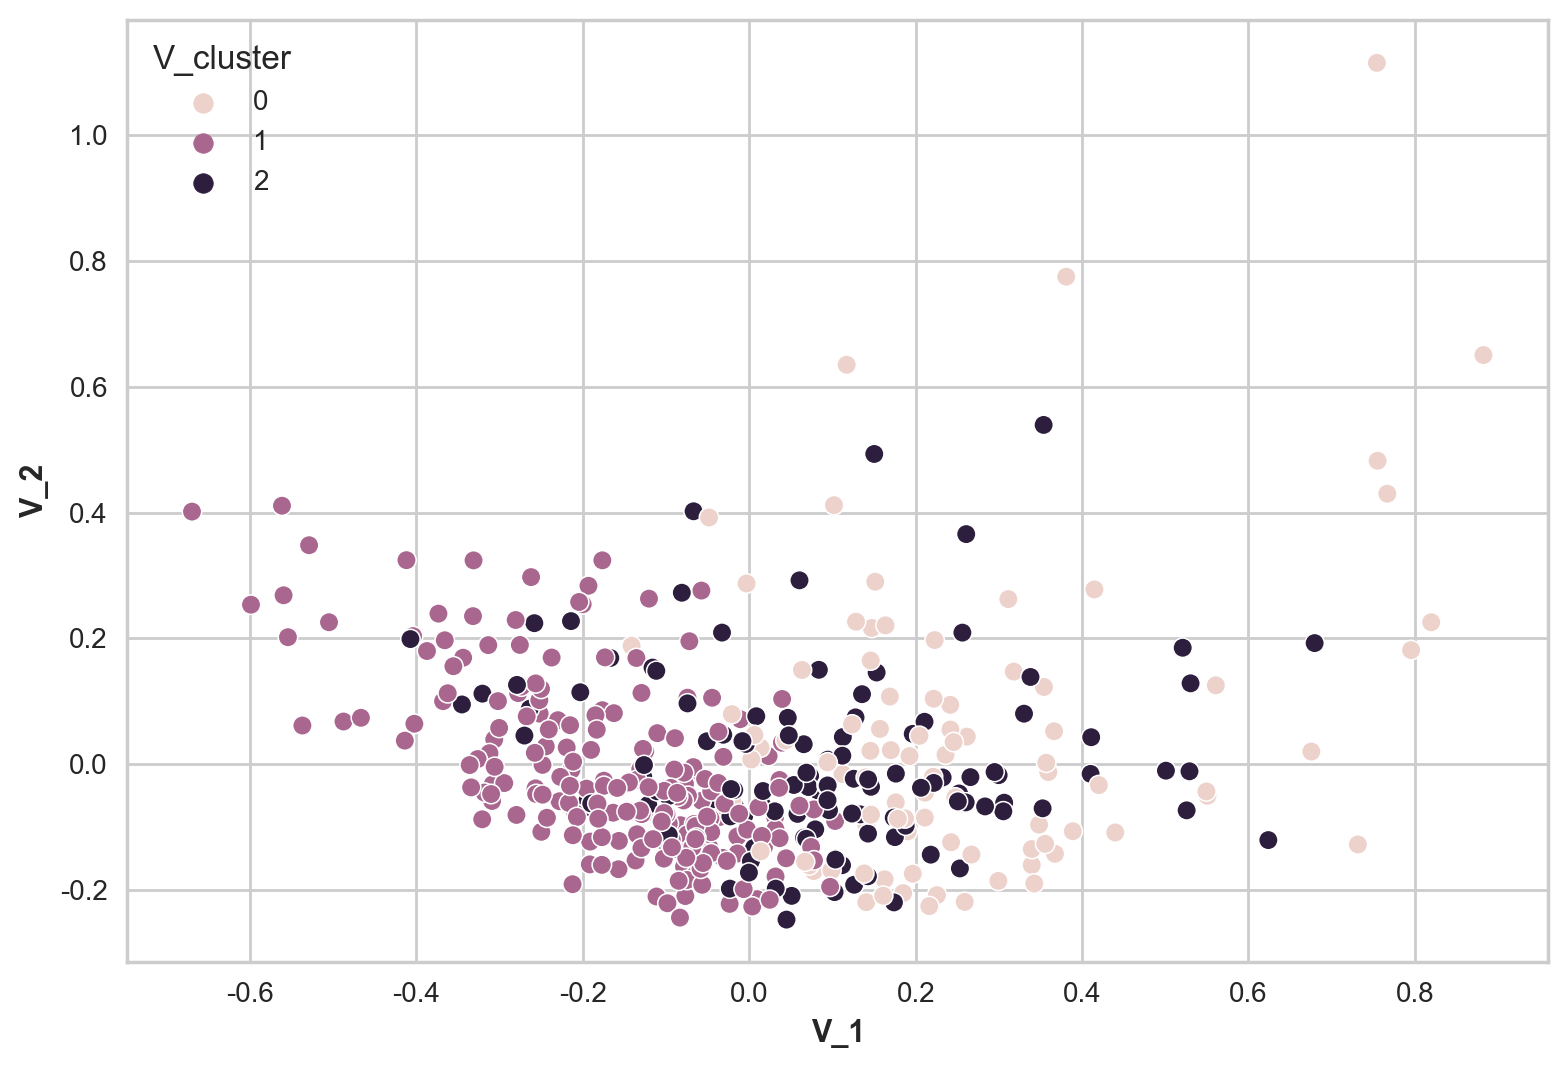

In [35]:
sns.scatterplot(data = pca_result_T.reset_index(), x = 'V_1', y = 'V_2', hue = 'V_cluster')

## 클러스터링 결과 해석

In [36]:
# 피처별 순위 계산
def rank(data):
    for col in data.columns:
        data[col] = data[col].rank(ascending=False).astype('int')
    return data

In [37]:
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
cluster_0

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                
가리봉동   15.774    0          0.0       7.196665    5.0         0.0   
가산동    17.357    3          0.0     139.446507    7.0         0.0   
광희동   129.972    3          1.0     159.140077    6.0         1.0   
구로3동   15.774    2          0.0     190.231358    1.0         1.0   
구로5동   15.774    2          0.0     230.289431    1.0         1.0   
...       ...  ...          ...            ...    ...         ...   
화양동    14.731    0          0.0     271.696115    4.0         1.0   
황학동    14.146    1          0.0       8.414964    5.0         0.0   
회기동    14.146    1          0.0     209.465261    2.0         0.0   
회현동   118.479    0          0.0     111.512469    8.0         4.0   
휘경1동   14.243    1          0.0      24.694998    0.0         0.0   

      승하차인원_버스_지하철    카페수  유치원_초등학교    인구수     총_10대  총_20_30대   총_60대이상  \
행정동명                                                                       
가리봉동      230955.0   11.0  0.000109   9200  0.026087  0.335870  0.287935   
가산동       940108.0  239.0  0.000020  49292  0.026130  0.546052  0.177798   
광희동       412314.0  135.0  0.000000  11362  0.034325  0.415948  0.278824   
구로3동      490330.0  118.0  0.000214  23339  0.056515  0.390120  0.241827   
구로5동      473423.0   74.0  0.000102  29309  0.049405  0.364871  0.252755   
...            ...    ...       ...    ...       ...       ...       ...   
화양동       460948.0  123.0  0.000064  46856  0.031970  0.642564  0.139363   
황학동       123176.0   37.0  0.000000  25620  0.036768  0.401639  0.228025   
회기동       218314.0   81.0  0.000239  20952  0.071974  0.470027  0.197785   
회현동      1045659.0  144.0  0.000109   9200  0.045000  0.210000  0.385435   
휘경1동      402280.0   35.0  0.000036  27806  0.058764  0.418902  0.217435   

          1인세대  
행정동명            
가리봉동  0.730643  
가산동   0.779580  
광희동   0.725238  
구로3동  0.619688  
구로5동  0.543037  
...        ...  
화양동   0.826281  
황학동   0.592687  
회기동   0.706243  
회현동   0.605868  
휘경1동  0.598816  

[92 rows x 14 columns]

In [38]:
data.loc[pca_result[pca_result['cluster'] == 0].index, :].to_csv('./data/cluster_0.csv')
data.loc[pca_result[pca_result['cluster'] == 1].index, :].to_csv('./data/cluster_1.csv')
data.loc[pca_result[pca_result['cluster'] == 2].index, :].to_csv('./data/cluster_2.csv')
data.loc[pca_result[pca_result['cluster'] == 3].index, :].to_csv('./data/cluster_3.csv')

In [39]:
# 클러스터 0 순위
cluster_0 = data.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_cluster_0 = cluster_0.copy()
ranked_cluster_0 = ranked_cluster_0.rank(ascending=False)
ranked_cluster_0['sum'] = ranked_cluster_0.sum(axis=1).astype('int')
ranked_cluster_0['ranking'] = ranked_cluster_0['sum'].rank(ascending=True)
ranked_cluster_0.sort_values('ranking').head(5)

미세먼지지수   공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                       
종로1.2.3.4가동     1.0  10.0          1.0           45.0    8.5         4.5   
신촌동            20.0  25.5         51.0           39.0   28.0        16.5   
사직동             4.5  10.0         51.0           17.0   57.0        16.5   
영등포동            3.0  25.5         51.0           51.0   28.0        66.0   
광희동             7.0  35.0          8.0           20.0   20.0        31.5   

             승하차인원_버스_지하철   카페수  유치원_초등학교   인구수  총_10대  총_20_30대  총_60대이상  \
행정동명                                                                        
종로1.2.3.4가동           1.0   2.0       3.0  81.0   84.0      85.0      2.0   
신촌동                   4.0   6.0      12.0  27.0   48.0       3.0     88.0   
사직동                  12.0   9.0      21.0  75.0    4.0      86.0     19.0   
영등포동                  5.0  13.0      51.0   1.0   87.0       6.0     83.0   
광희동                  34.0  12.0      86.5  83.0   77.0      33.0     18.0   

             1인세대  sum  ranking  
행정동명                             
종로1.2.3.4가동   3.0  331      1.0  
신촌동           4.0  372      2.0  
사직동          90.0  472      3.0  
영등포동          7.0  477      4.0  
광희동          14.0  479      5.0

In [40]:
# 클러스터 1 순위
cluster_1 = data.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_cluster_1 = cluster_1.copy()
ranked_cluster_1 = ranked_cluster_1.rank(ascending=False)
ranked_cluster_1['sum'] = ranked_cluster_1.sum(axis=1).astype('int')
ranked_cluster_1['ranking'] = ranked_cluster_1['sum'].rank(ascending=True)
ranked_cluster_1.sort_values('ranking').head(5)

미세먼지지수    공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                 
길동      56.0   47.5        118.0           35.0    4.0       126.0   
오류2동    19.0    7.5        118.0          164.0   26.0        23.5   
구로2동    87.5  105.5          7.0           76.0   10.5         5.5   
월곡2동    28.5   73.5        118.0           61.0   41.0       126.0   
상계2동   140.5  204.5        118.0           18.0   14.5        23.5   

      승하차인원_버스_지하철   카페수  유치원_초등학교    인구수  총_10대  총_20_30대  총_60대이상   1인세대  \
행정동명                                                                         
길동            35.0  14.0      25.0   25.0  172.0      29.0     95.0   45.0   
오류2동          53.0  52.0       3.0   72.0   29.0     164.0     83.0  155.0   
구로2동           5.0  65.5     122.0  178.0  193.0     135.0     22.0   12.0   
월곡2동         101.0  15.5     177.0   69.0  102.0      17.0    110.0   19.0   
상계2동          13.0   4.0     100.0   65.0   65.0     104.0     99.0   95.0   

       sum  ranking  
행정동명                 
길동     826      1.0  
오류2동   969      2.0  
구로2동  1024      3.0  
월곡2동  1058      4.0  
상계2동  1064      5.0

In [41]:
# 클러스터 2 순위
cluster_2 = data.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_cluster_2 = cluster_2.copy()
ranked_cluster_2 = ranked_cluster_2.rank(ascending=False)
ranked_cluster_2['sum'] = ranked_cluster_2.sum(axis=1).astype('int')
ranked_cluster_2['ranking'] = ranked_cluster_2['sum'].rank(ascending=True)
ranked_cluster_2.sort_values('ranking').head(5)

미세먼지지수   공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                
진관동     26.0   5.0         71.0           78.0   58.5        18.0   
성산2동    24.0  15.5         18.0           60.0    6.0        18.0   
화곡1동    65.5  10.5         71.0           20.0   83.0         7.0   
공릉1동    48.5  36.0         71.0           22.0   19.0        18.0   
상암동     57.5   4.0          4.5           11.0  104.0         4.5   

      승하차인원_버스_지하철   카페수  유치원_초등학교   인구수  총_10대  총_20_30대  총_60대이상  1인세대  sum  \
행정동명                                                                            
진관동           10.0  10.5       2.5   7.0    2.0      28.0     11.0  98.0  425   
성산2동          53.0  56.5      47.0  14.0   61.0      19.0     81.0  29.0  502   
화곡1동          16.0  27.5      77.5   7.0  111.0       2.0      8.0  11.0  517   
공릉1동          77.0  25.5      16.0  25.0   77.0      26.0     37.0  21.0  519   
상암동            7.0   5.0      14.0  60.0   17.0      88.0    101.0  71.0  548   

      ranking  
행정동명           
진관동       1.0  
성산2동      2.0  
화곡1동      3.0  
공릉1동      4.0  
상암동       5.0

In [42]:
# 클러스터 3 순위
cluster_3 = data.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_cluster_3 = cluster_3.copy()
ranked_cluster_3 = ranked_cluster_3.rank(ascending=False)
ranked_cluster_3['sum'] = ranked_cluster_3.sum(axis=1).astype('int')
ranked_cluster_3['ranking'] = ranked_cluster_3['sum'].rank(ascending=True)
ranked_cluster_3.sort_values('ranking').head(5)

Empty DataFrame
Columns: [미세먼지지수, 공원수, 도시농업(프로그램수), 거주_유동_인구당_매출액, 채소가게수, 제로웨이스트 가게수, 승하차인원_버스_지하철, 카페수, 유치원_초등학교, 인구수, 총_10대, 총_20_30대, 총_60대이상, 1인세대, sum, ranking]
Index: []

In [43]:
print(ranked_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

['종로1.2.3.4가동', '신촌동', '사직동', '영등포동', '광희동']
['길동', '오류2동', '구로2동', '월곡2동', '상계2동']
['진관동', '성산2동', '화곡1동', '공릉1동', '상암동']
[]


In [44]:
areas = ranked_cluster_0.sort_values('ranking').head(5).index.to_list()
areas.extend(ranked_cluster_1.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_2.sort_values('ranking').head(5).index.to_list())
areas.extend(ranked_cluster_3.sort_values('ranking').head(5).index.to_list())

In [45]:
result_df = data.copy()
result_df = result_df.loc[areas]
result_df

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                       
종로1.2.3.4가동  343.590    6         11.0      71.699557    8.0         5.0   
신촌동           63.233    4          0.0      92.621299    5.0         2.0   
사직동          142.175    6          0.0     171.997150    2.0         2.0   
영등포동         150.959    4          0.0      58.893061    5.0         0.0   
광희동          129.972    3          1.0     159.140077    6.0         1.0   
길동            17.327    5          0.0     150.963203   15.0         0.0   
오류2동          34.714    9          0.0      13.821674    5.0         1.0   
구로2동          15.774    3          2.0      68.336947    8.0         2.0   
월곡2동          27.697    4          0.0      85.748843    4.0         0.0   
상계2동          14.719    0          0.0     239.523296    7.0         1.0   
진관동           18.541   16          0.0      27.848659    3.0         2.0   
성산2동          27.689   11          1.0      35.942243   11.0         2.0   
화곡1동          14.838   13          0.0      84.231195    2.0         3.0   
공릉1동          15.673    8          0.0      80.254290    7.0         2.0   
상암동           15.340   18          3.0     121.641730    1.0         4.0   

             승하차인원_버스_지하철    카페수  유치원_초등학교    인구수     총_10대  총_20_30대  \
행정동명                                                                    
종로1.2.3.4가동     1910857.0  324.0  0.000224  13400  0.030448  0.285821   
신촌동             1173952.0  223.0  0.000147  40694  0.046149  0.598663   
사직동              783977.0  146.0  0.000110  18178  0.073055  0.275498   
영등포동            1132620.0  131.0  0.000066  60792  0.027767  0.540170   
광희동              412314.0  135.0  0.000000  11362  0.034325  0.415948   
길동               288559.0   69.0  0.000179  44808  0.059141  0.304722   
오류2동             247964.0   42.0  0.000318  37708  0.105415  0.236395   
구로2동             610995.0   39.0  0.000088  22803  0.053546  0.249485   
월곡2동             193005.0   64.0  0.000052  38206  0.073863  0.319374   
상계2동             419371.0  113.0  0.000103  38810  0.085493  0.265241   
진관동              703798.0  114.0  0.000173  80894  0.177096  0.318145   
성산2동             370508.0   55.0  0.000090  77894  0.078799  0.342671   
화곡1동             614122.0   80.0  0.000062  80894  0.055134  0.492941   
공릉1동             296420.0   81.0  0.000124  72480  0.069233  0.320088   
상암동              837102.0  151.0  0.000134  59922  0.127633  0.260071   

              총_60대이상      1인세대  
행정동명                             
종로1.2.3.4가동  0.366716  0.801009  
신촌동          0.144395  0.799559  
사직동          0.278248  0.504722  
영등포동         0.167752  0.769605  
광희동          0.278824  0.725238  
길동           0.284525  0.464401  
오류2동         0.291185  0.322479  
구로2동         0.338903  0.521122  
월곡2동         0.274564  0.505611  
상계2동         0.281525  0.398998  
진관동          0.314411  0.306428  
성산2동         0.229029  0.489176  
화곡1동         0.317082  0.542225  
공릉1동         0.278146  0.511409  
상암동          0.205434  0.373043

In [46]:
result_df.to_csv('./data/result_1023.csv')

클러스터별 통계량 비교하기

In [47]:
cluster_0.describe()

미세먼지지수        공원수  도시농업(프로그램수)  거주_유동_인구당_매출액      채소가게수  \
count   92.000000  92.000000    92.000000      92.000000  92.000000   
mean    42.571609   2.847826     0.369565     100.607779   4.391304   
std     54.524646   2.188556     1.615294     104.791996   9.074728   
min     12.345000   0.000000     0.000000       5.569636   0.000000   
25%     14.245000   1.000000     0.000000      26.463137   1.000000   
50%     17.205000   2.000000     0.000000      68.033905   2.500000   
75%     50.320000   4.000000     0.000000     139.766169   5.000000   
max    343.590000  11.000000    11.000000     656.620172  86.000000   

       제로웨이스트 가게수  승하차인원_버스_지하철         카페수   유치원_초등학교           인구수  \
count   92.000000  9.200000e+01   92.000000  92.000000     92.000000   
mean     1.239130  4.275364e+05   82.673913   0.000084  31813.489130   
std      3.484249  3.355396e+05   68.413434   0.000071  13547.933055   
min      0.000000  5.239100e+04    0.000000   0.000000   9200.000000   
25%      0.000000  2.201565e+05   37.750000   0.000041  20941.500000   
50%      0.000000  2.991380e+05   63.000000   0.000073  33081.500000   
75%      1.250000  4.955320e+05  100.250000   0.000109  42815.000000   
max     31.000000  1.910857e+06  406.000000   0.000435  60792.000000   

           총_10대   총_20_30대    총_60대이상       1인세대  
count  92.000000  92.000000  92.000000  92.000000  
mean    0.047769   0.389518   0.235033   0.630064  
std     0.015462   0.096834   0.058025   0.086596  
min     0.000543   0.001957   0.001739   0.469768  
25%     0.039322   0.334017   0.207487   0.559800  
50%     0.046406   0.394556   0.239643   0.614281  
75%     0.055378   0.434890   0.270283   0.692467  
max     0.120295   0.664557   0.385435   0.857793

In [48]:
cluster_1.describe()

미세먼지지수         공원수  도시농업(프로그램수)  거주_유동_인구당_매출액       채소가게수  \
count  213.000000  213.000000   213.000000     213.000000  213.000000   
mean    20.498178    3.394366     0.164319      84.598687    2.568075   
std     16.272975    2.533617     0.519655     126.530540    3.065529   
min     11.848000    0.000000     0.000000       1.287593    0.000000   
25%     14.146000    2.000000     0.000000      15.928624    1.000000   
50%     15.646000    3.000000     0.000000      41.608369    2.000000   
75%     17.327000    5.000000     0.000000      92.024227    3.000000   
max    118.479000   14.000000     3.000000     996.190369   20.000000   

       제로웨이스트 가게수   승하차인원_버스_지하철         카페수    유치원_초등학교           인구수  \
count  213.000000     213.000000  213.000000  213.000000    213.000000   
mean     0.234742  209796.957746   32.234742    0.000108  32617.957746   
std      0.599776  120781.500697   23.040598    0.000061  10003.510583   
min      0.000000   22966.000000    1.000000    0.000000   9200.000000   
25%      0.000000  135118.000000   17.000000    0.000067  25607.000000   
50%      0.000000  184885.000000   27.000000    0.000099  33380.000000   
75%      0.000000  247242.000000   42.000000    0.000145  39890.000000   
max      5.000000  680504.000000  152.000000    0.000352  52588.000000   

            총_10대    총_20_30대     총_60대이상        1인세대  
count  213.000000  213.000000  213.000000  213.000000  
mean     0.079467    0.261133    0.276340    0.374860  
std      0.028362    0.042224    0.053716    0.100810  
min      0.008478    0.010435    0.013043    0.078523  
25%      0.061817    0.239557    0.244211    0.314886  
50%      0.072642    0.263412    0.276529    0.387715  
75%      0.092104    0.285284    0.308531    0.452234  
max      0.223722    0.342607    0.459634    0.594666

In [49]:
cluster_2.describe()

미세먼지지수         공원수  도시농업(프로그램수)  거주_유동_인구당_매출액       채소가게수  \
count  121.000000  121.000000   121.000000     121.000000  121.000000   
mean    21.243174    6.760331     0.355372      48.256531    3.851240   
std     15.969964    4.293454     0.883737      41.042154    3.350774   
min     11.848000    0.000000     0.000000       0.986333    0.000000   
25%     14.146000    4.000000     0.000000      19.716065    2.000000   
50%     14.838000    6.000000     0.000000      35.834189    3.000000   
75%     17.205000    9.000000     0.000000      63.812587    5.000000   
max    100.640000   26.000000     4.000000     205.761715   18.000000   

       제로웨이스트 가게수  승하차인원_버스_지하철         카페수    유치원_초등학교           인구수  \
count  121.000000  1.210000e+02  121.000000  121.000000    121.000000   
mean     0.884298  3.993050e+05   63.041322    0.000081  61937.842975   
std      1.355176  2.189823e+05   43.742694    0.000039  10588.867318   
min      0.000000  1.312770e+05   10.000000    0.000016  36920.000000   
25%      0.000000  2.490690e+05   38.000000    0.000052  53990.000000   
50%      0.000000  3.561700e+05   53.000000    0.000073  59820.000000   
75%      1.000000  4.561040e+05   75.000000    0.000103  69620.000000   
max      8.000000  1.631757e+06  302.000000    0.000226  80894.000000   

            총_10대    총_20_30대     총_60대이상        1인세대  
count  121.000000  121.000000  121.000000  121.000000  
mean     0.087116    0.290444    0.252391    0.394349  
std      0.032772    0.060770    0.046885    0.118738  
min      0.042280    0.179623    0.144411    0.132038  
25%      0.063586    0.257882    0.221500    0.318118  
50%      0.078799    0.281570    0.254825    0.407836  
75%      0.102417    0.314603    0.286621    0.484616  
max      0.199636    0.531129    0.363388    0.733199

In [50]:
cluster_3.describe().astype('float')

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
count     0.0  0.0          0.0            0.0    0.0         0.0   
mean      NaN  NaN          NaN            NaN    NaN         NaN   
std       NaN  NaN          NaN            NaN    NaN         NaN   
min       NaN  NaN          NaN            NaN    NaN         NaN   
25%       NaN  NaN          NaN            NaN    NaN         NaN   
50%       NaN  NaN          NaN            NaN    NaN         NaN   
75%       NaN  NaN          NaN            NaN    NaN         NaN   
max       NaN  NaN          NaN            NaN    NaN         NaN   

       승하차인원_버스_지하철  카페수  유치원_초등학교  인구수  총_10대  총_20_30대  총_60대이상  1인세대  
count           0.0  0.0       0.0  0.0    0.0       0.0      0.0   0.0  
mean            NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN  
std             NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN  
min             NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN  
25%             NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN  
50%             NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN  
75%             NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN  
max             NaN  NaN       NaN  NaN    NaN       NaN      NaN   NaN

min_max 스케일링된 데이터로 랭킹 구하기

In [51]:
scaled_cluster_0 = scaled_df.loc[pca_result[pca_result['cluster'] == 0].index, :]
ranked_scaled_cluster_0 = scaled_cluster_0.copy()
ranked_scaled_cluster_0.columns = data.columns
ranked_scaled_cluster_0['sum'] = ranked_scaled_cluster_0.sum(axis=1)
ranked_scaled_cluster_0['ranking'] = ranked_scaled_cluster_0['sum'].rank(ascending=False)
ranked_scaled_cluster_0.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  \
행정동명                                                                    
종로1.2.3.4가동  1.000000  0.230769          1.0       0.071054  0.093023   
명동           0.785713  0.307692          0.0       0.163768  0.034884   
서교동          0.098311  0.269231          0.0       0.078437  0.023256   
신촌동          0.154894  0.153846          0.0       0.092077  0.058140   
영등포동         0.419335  0.153846          0.0       0.058186  0.058140   

             제로웨이스트 가게수  승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  \
행정동명                                                                            
종로1.2.3.4가동    0.161290      1.000000  0.798030  0.514925  0.058582  0.133993   
명동             1.000000      0.428661  0.564039  0.250000  0.000000  0.127116   
서교동            0.000000      0.886659  1.000000  0.142227  0.548358  0.193367   
신촌동            0.064516      0.609668  0.549261  0.339116  0.439284  0.204347   
영등포동           0.000000      0.587774  0.322660  0.151336  0.719614  0.121980   

             총_20_30대   총_60대이상      1인세대       sum  ranking  
행정동명                                                          
종로1.2.3.4가동  0.428410  0.797076  0.927132  7.214284      1.0  
명동           0.226053  0.455297  0.794360  5.137583      2.0  
서교동          0.708502  0.408458  0.766423  5.123229      3.0  
신촌동          0.900553  0.311546  0.925271  4.802519      4.0  
영등포동         0.812274  0.362557  0.886833  4.654535      5.0

In [52]:
scaled_cluster_1 = scaled_df.loc[pca_result[pca_result['cluster'] == 1].index, :]
ranked_scaled_cluster_1 = scaled_cluster_1.copy()
ranked_scaled_cluster_1.columns = data.columns
ranked_scaled_cluster_1['sum'] = ranked_scaled_cluster_1.sum(axis=1)
ranked_scaled_cluster_1['ranking'] = ranked_scaled_cluster_1['sum'].rank(ascending=False)
ranked_scaled_cluster_1.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                         
오류2동  0.068927  0.346154          0.0       0.012897  0.058140    0.032258   
개포3동  0.114037  0.153846          0.0       1.000000  0.000000    0.000000   
길동    0.016516  0.192308          0.0       0.150700  0.174419    0.000000   
수서동   0.014204  0.153846          0.0       0.072118  0.011628    0.000000   
명일2동  0.016516  0.076923          0.0       0.477318  0.023256    0.000000   

      승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                   
오류2동      0.119180  0.103448  0.731940  0.397634  0.469901  0.353816   
개포3동      0.024656  0.036946  0.404242  0.109758  0.433850  0.358588   
길동        0.140682  0.169951  0.410641  0.496666  0.262560  0.456936   
수서동       0.198989  0.073892  0.808720  0.070020  0.154170  0.325952   
명일2동      0.048038  0.100985  0.801859  0.111725  0.616430  0.351066   

       총_60대이상      1인세대       sum  ranking  
행정동명                                         
오류2동  0.632122  0.313057  3.639475      1.0  
개포3동  0.615843  0.341025  3.592791      2.0  
길동    0.617578  0.495179  3.584135      3.0  
수서동   1.000000  0.539121  3.422660      4.0  
명일2동  0.527522  0.245873  3.397511      5.0

In [53]:
scaled_cluster_2 = scaled_df.loc[pca_result[pca_result['cluster'] == 2].index, :]
ranked_scaled_cluster_2 = scaled_cluster_2.copy()
ranked_scaled_cluster_2.columns = data.columns
ranked_scaled_cluster_2['sum'] = ranked_scaled_cluster_2.sum(axis=1)
ranked_scaled_cluster_2['ranking'] = ranked_scaled_cluster_2['sum'].rank(ascending=False)
ranked_scaled_cluster_2.sort_values('ranking').head(5)

미세먼지지수       공원수  도시농업(프로그램수)  거주_유동_인구당_매출액     채소가게수  제로웨이스트 가게수  \
행정동명                                                                         
진관동   0.020175  0.615385     0.000000       0.026992  0.034884    0.064516   
양재1동  0.058292  1.000000     0.000000       0.036686  0.023256    0.000000   
상암동   0.010526  0.692308     0.272727       0.121237  0.011628    0.129032   
여의동   0.014846  0.153846     0.000000       0.080705  0.046512    0.064516   
가양1동  0.056767  0.461538     0.000000       0.076893  0.023256    0.225806   

      승하차인원_버스_지하철       카페수  유치원_초등학교       인구수     총_10대  총_20_30대  \
행정동명                                                                   
진관동       0.360631  0.280788  0.398052  1.000000  0.791082  0.477193   
양재1동      0.488580  0.280788  0.341187  1.000000  0.489318  0.403276   
상암동       0.431241  0.371921  0.307066  0.707479  0.569451  0.389548   
여의동       0.852163  0.743842  0.246970  0.780958  0.405565  0.370934   
가양1동      0.228031  0.536946  0.134980  0.822356  0.226998  0.740069   

       총_60대이상      1인세대       sum  ranking  
행정동명                                         
진관동   0.682847  0.292459  5.045004      1.0  
양재1동  0.566165  0.352300  5.039847      2.0  
상암동   0.444850  0.377943  4.836957      3.0  
여의동   0.585880  0.307461  4.654198      4.0  
가양1동  0.349175  0.768318  4.651134      5.0

In [54]:
scaled_cluster_3 = scaled_df.loc[pca_result[pca_result['cluster'] == 3].index, :]
ranked_scaled_cluster_3 = scaled_cluster_3.copy()
ranked_scaled_cluster_3.columns = data.columns
ranked_scaled_cluster_3['sum'] = ranked_scaled_cluster_3.sum(axis=1)
ranked_scaled_cluster_3['ranking'] = ranked_scaled_cluster_3['sum'].rank(ascending=False)
ranked_scaled_cluster_3.sort_values('ranking').head(5)

Empty DataFrame
Columns: [미세먼지지수, 공원수, 도시농업(프로그램수), 거주_유동_인구당_매출액, 채소가게수, 제로웨이스트 가게수, 승하차인원_버스_지하철, 카페수, 유치원_초등학교, 인구수, 총_10대, 총_20_30대, 총_60대이상, 1인세대, sum, ranking]
Index: []

In [55]:
print(ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
print(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

['종로1.2.3.4가동', '명동', '서교동', '신촌동', '영등포동']
['오류2동', '개포3동', '길동', '수서동', '명일2동']
['진관동', '양재1동', '상암동', '여의동', '가양1동']
[]


In [56]:
scaled_areas = ranked_scaled_cluster_0.sort_values('ranking').head(5).index.to_list()
scaled_areas.extend(ranked_scaled_cluster_1.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_2.sort_values('ranking').head(5).index.to_list())
scaled_areas.extend(ranked_scaled_cluster_3.sort_values('ranking').head(5).index.to_list())

In [57]:
scaled_result_df = data.copy()
scaled_result_df = scaled_result_df.loc[scaled_areas]
scaled_result_df

미세먼지지수  공원수  도시농업(프로그램수)  거주_유동_인구당_매출액  채소가게수  제로웨이스트 가게수  \
행정동명                                                                       
종로1.2.3.4가동  343.590    6         11.0      71.699557    8.0         5.0   
명동           272.502    8          0.0     163.968537    3.0        31.0   
서교동           44.462    7          0.0      79.047032    2.0         0.0   
신촌동           63.233    4          0.0      92.621299    5.0         2.0   
영등포동         150.959    4          0.0      58.893061    5.0         0.0   
오류2동          34.714    9          0.0      13.821674    5.0         1.0   
개포3동          49.679    4          0.0     996.190369    0.0         0.0   
길동            17.327    5          0.0     150.963203   15.0         0.0   
수서동           16.560    4          0.0      72.758912    1.0         0.0   
명일2동          17.327    2          0.0     476.014744    2.0         0.0   
진관동           18.541   16          0.0      27.848659    3.0         2.0   
양재1동          31.186   26          0.0      37.496612    2.0         0.0   
상암동           15.340   18          3.0     121.641730    1.0         4.0   
여의동           16.773    4          0.0      81.303879    4.0         2.0   
가양1동          30.680   12          0.0      77.510970    2.0         7.0   

             승하차인원_버스_지하철    카페수  유치원_초등학교    인구수     총_10대  총_20_30대  \
행정동명                                                                    
종로1.2.3.4가동     1910857.0  324.0  0.000224  13400  0.030448  0.285821   
명동               832232.0  229.0  0.000109   9200  0.028913  0.151739   
서교동             1696882.0  406.0  0.000062  48514  0.043699  0.471410   
신촌동             1173952.0  223.0  0.000147  40694  0.046149  0.598663   
영등포동            1132620.0  131.0  0.000066  60792  0.027767  0.540170   
오류2동             247964.0   42.0  0.000318  37708  0.105415  0.236395   
개포3동              69514.0   15.0  0.000176  17069  0.097370  0.239557   
길동               288559.0   69.0  0.000179  44808  0.059141  0.304722   
수서동              398636.0   30.0  0.000352  14220  0.034951  0.217932   
명일2동             113657.0   41.0  0.000349  17210  0.138117  0.234573   
진관동              703798.0  114.0  0.000173  80894  0.177096  0.318145   
양재1동             945351.0  114.0  0.000148  80894  0.109749  0.269167   
상암동              837102.0  151.0  0.000134  59922  0.127633  0.260071   
여의동             1631757.0  302.0  0.000107  65190  0.091057  0.247737   
가양1동             453464.0  218.0  0.000059  68158  0.051205  0.492327   

              총_60대이상      1인세대  
행정동명                             
종로1.2.3.4가동  0.366716  0.801009  
명동           0.210217  0.697544  
서교동          0.188770  0.675773  
신촌동          0.144395  0.799559  
영등포동         0.167752  0.769605  
오류2동         0.291185  0.322479  
개포3동         0.283731  0.344273  
길동           0.284525  0.464401  
수서동          0.459634  0.498644  
명일2동         0.243289  0.270125  
진관동          0.314411  0.306428  
양재1동         0.260984  0.353060  
상암동          0.205434  0.373043  
여의동          0.270011  0.318118  
가양1동         0.161624  0.677250

클러스터링 이후, scaled data

c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\mecab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_f

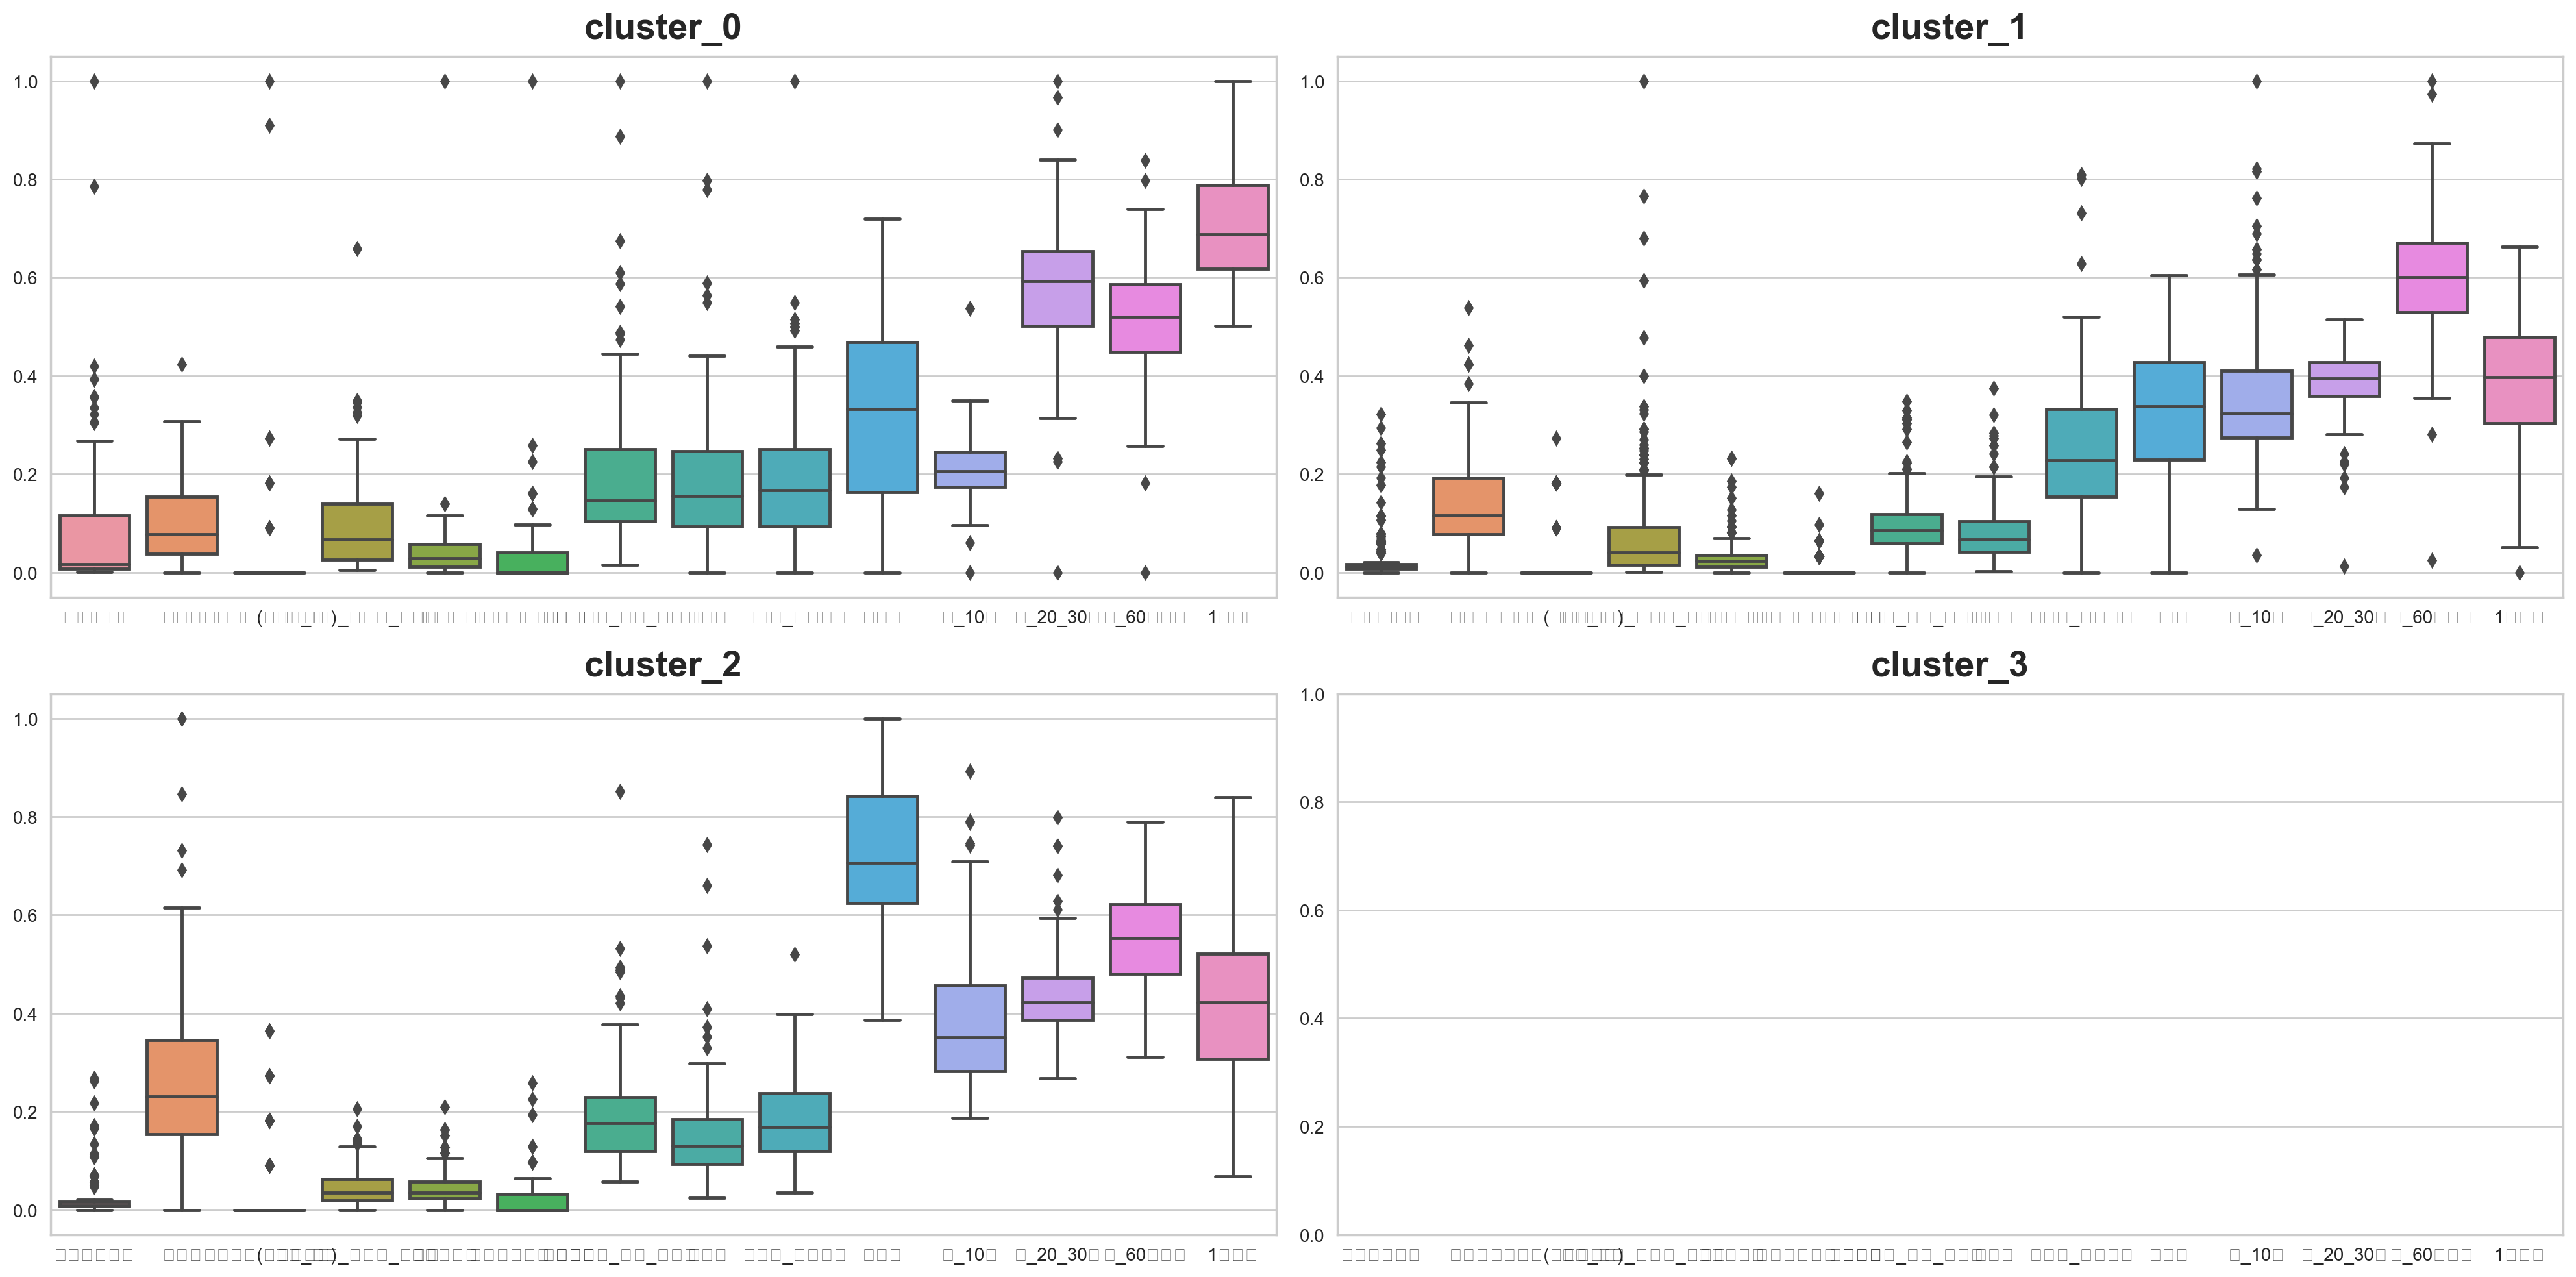

In [58]:
fig , axes = plt.subplots(nrows=2 ,ncols=2,
                          figsize=(20,10) )
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax = axes.flatten()
sns.boxplot(data=scaled_cluster_0, ax = ax[0])
ax[0].set_title("cluster_0", fontsize= 20)

sns.boxplot(data=scaled_cluster_1, ax = ax[1])
ax[1].set_title("cluster_1", fontsize= 20)

sns.boxplot(data=scaled_cluster_2, ax = ax[2])
ax[2].set_title("cluster_2", fontsize= 20)

sns.boxplot(data=scaled_cluster_3, ax = ax[3])
ax[3].set_title("cluster_3", fontsize= 20)

plt.show()

In [59]:
# 클러스터링 레이블을 붙인 전체 데이터셋 만들기(row)
cluster_0['cluster'] = 0
cluster_1['cluster'] = 1
cluster_2['cluster'] = 2
cluster_3['cluster'] = 3

result_w_original = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3])

In [60]:
# 클러스터링 레이블을 붙인 전체 데이터셋 만들기(scaled)
scaled_cluster_0['cluster'] = 0
scaled_cluster_1['cluster'] = 1
scaled_cluster_2['cluster'] = 2
scaled_cluster_3['cluster'] = 3

result_w_scaled = pd.concat([scaled_cluster_0, scaled_cluster_1, scaled_cluster_2, scaled_cluster_3])

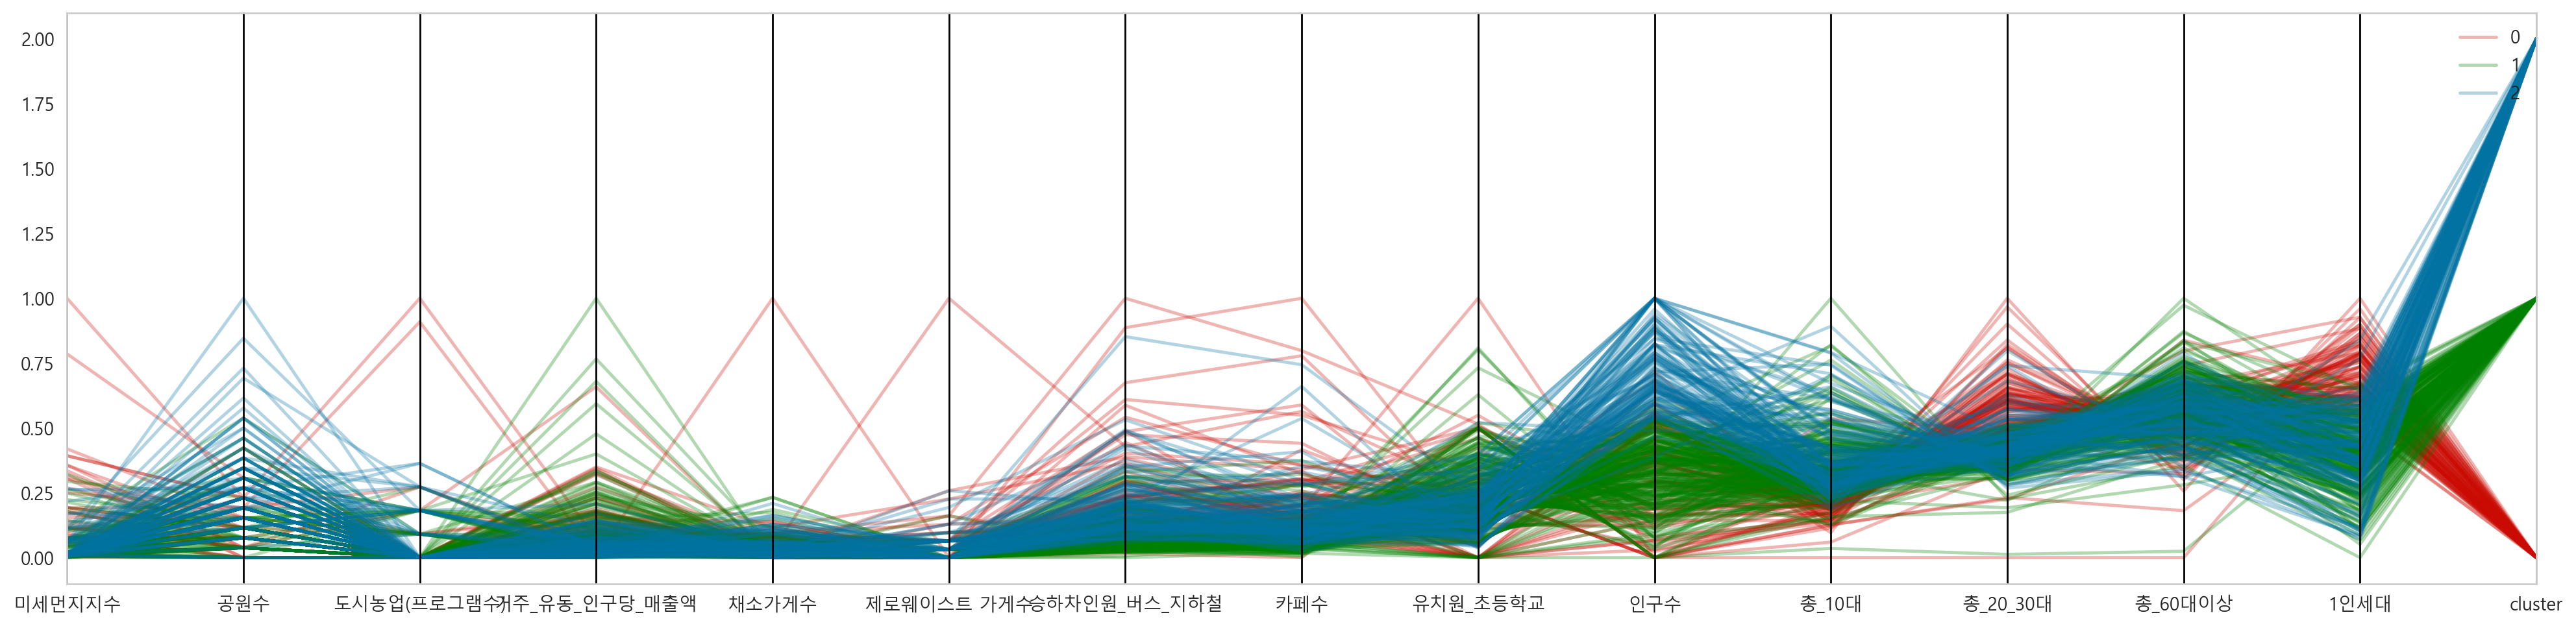

In [79]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,5))
parallel_coordinates(result_w_scaled, class_column='cluster', cols=result_w_scaled.columns, color=['r', 'green', 'b', 'y'], alpha=0.3)
plt.show()

In [62]:
list0 = cluster_0.index.to_list()
list1 = cluster_1.index.to_list()
list2 = cluster_2.index.to_list()
list3 = cluster_3.index.to_list()

In [63]:
tmp = pd.DataFrame(index=[0,1,2,3], data=[list0, list1, list2, list3]).T
tmp.to_csv('./data/test.csv', index=None)
tmp.to_excel('./data/test.xlsx')

클러스터링 이후, 주성분 feature 분포 시각화

In [64]:
def histplot(data, row_num, col_num) :
    fig, ax = plt.subplots(ncols = col_num, figsize = (18,4))
    rep = int(len(data.columns) / col_num)
    
    for i in range(col_num) :
        sns.kdeplot(data.iloc[:, row_num + (rep * i)], ax = ax[i])
        ax[i].set_title(data.iloc[:, row_num + (rep * i)].name)

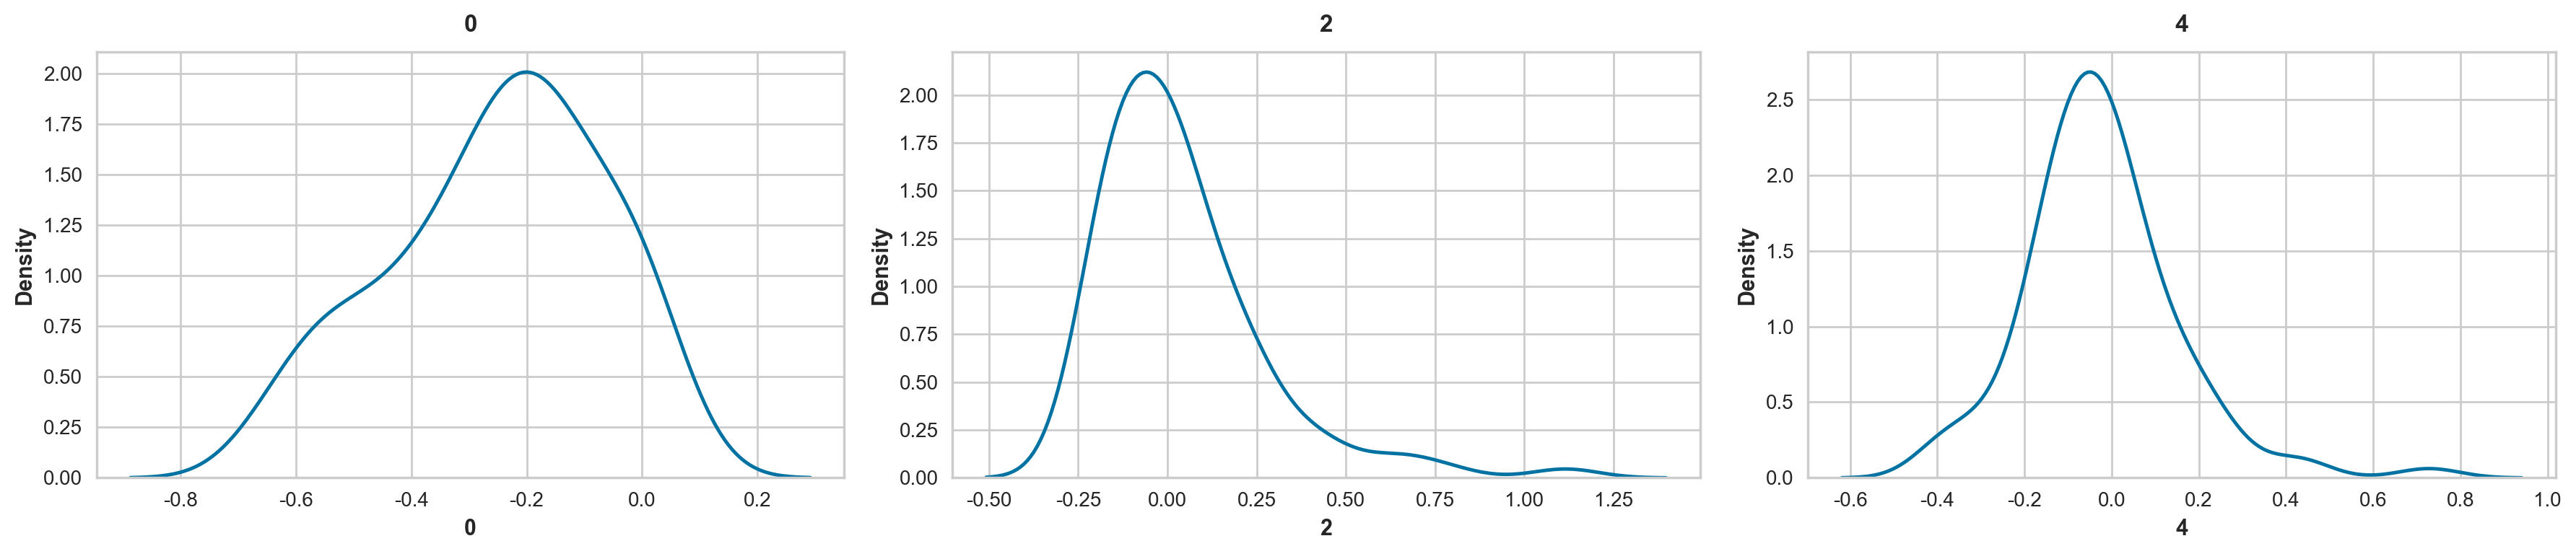

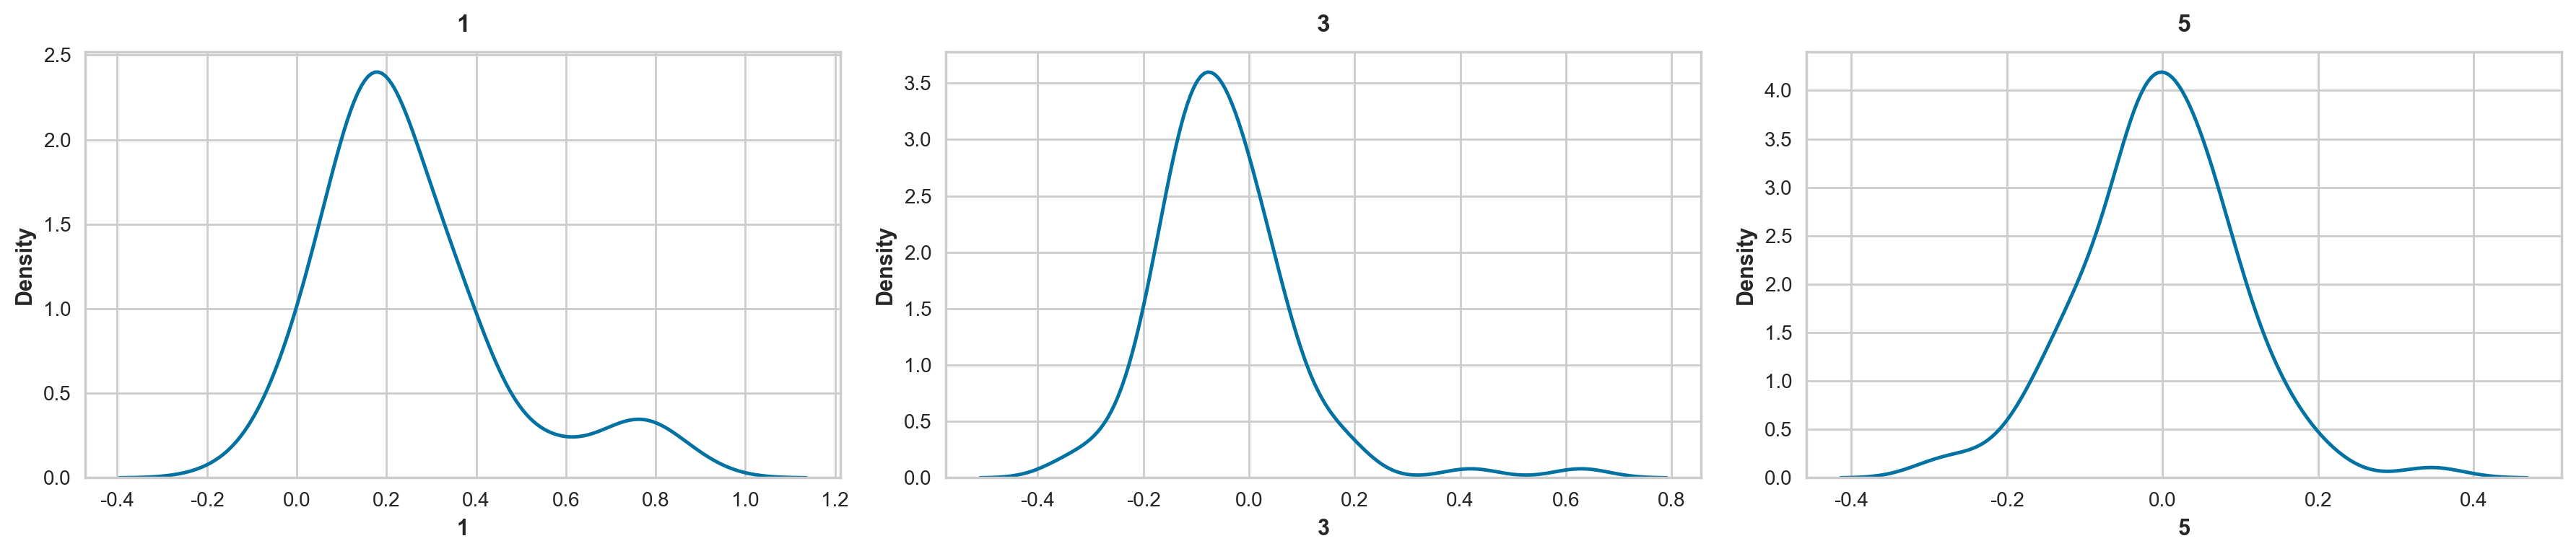

In [65]:
first_group = pca_result[pca_result['cluster'] == 0]

for row_num in range(2) :
    histplot(first_group.drop(['cluster'], axis = 1), row_num, 3)

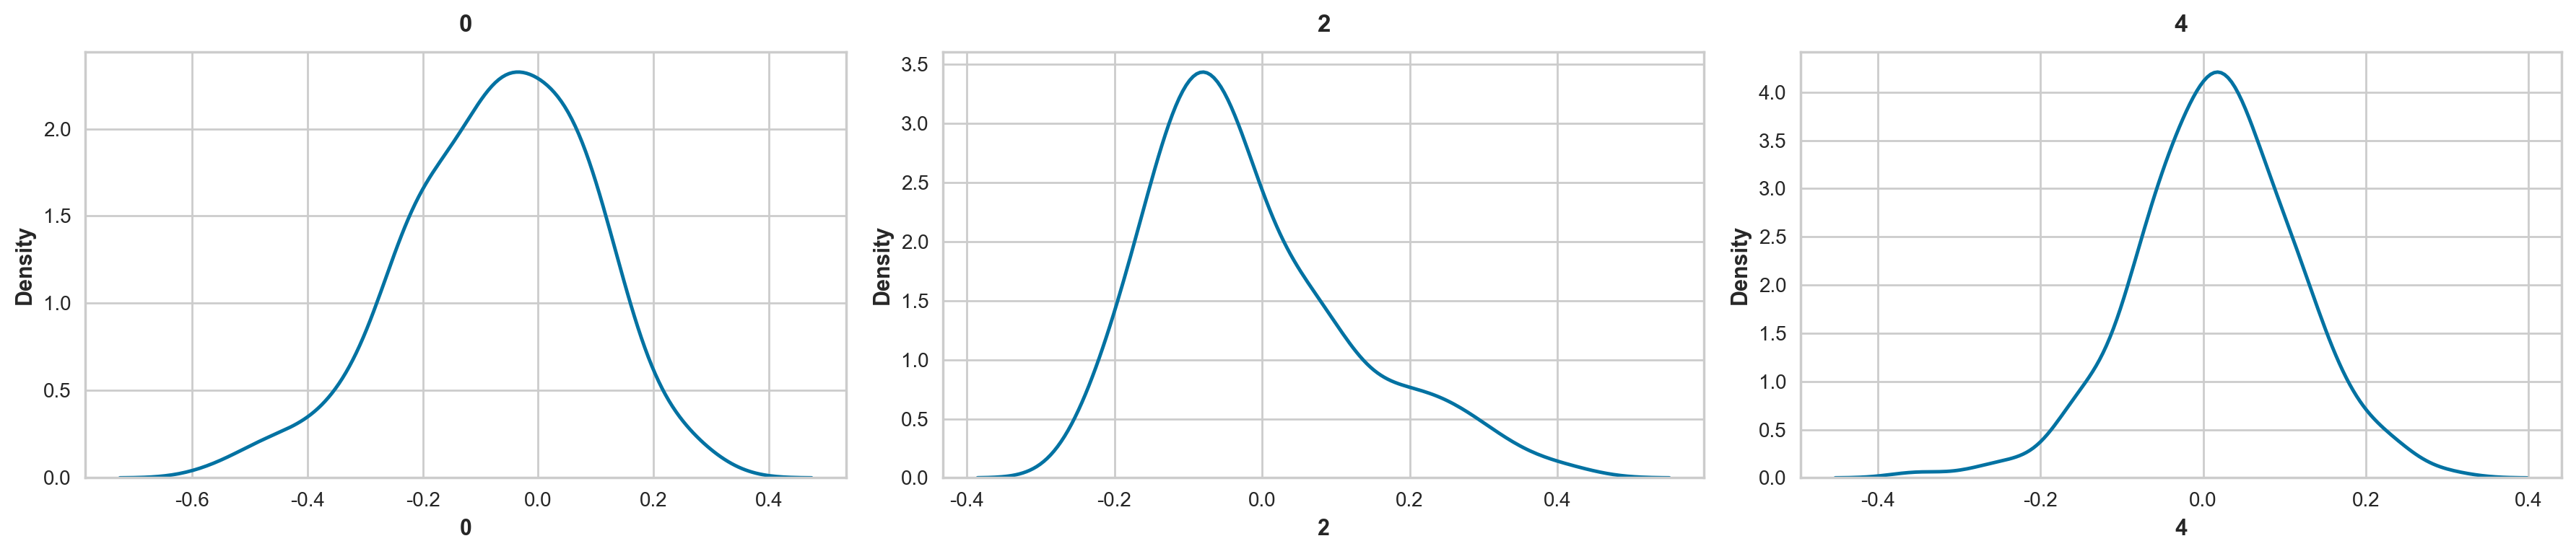

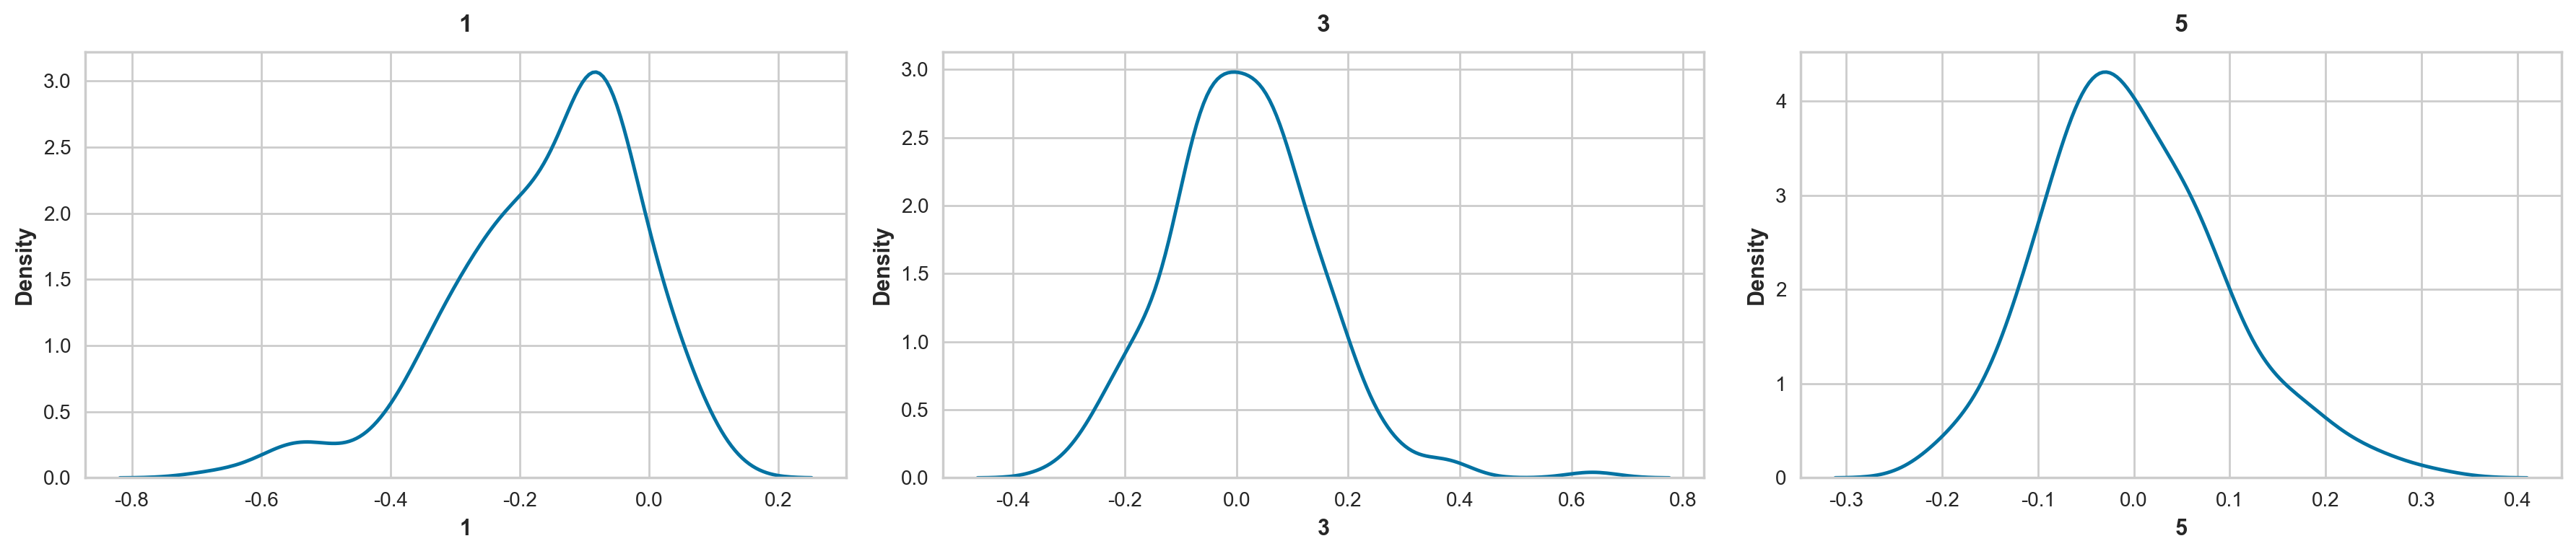

In [66]:
second_group = pca_result[pca_result['cluster'] == 1]

for row_num in range(2) :
    histplot(second_group.drop(['cluster'], axis = 1), row_num, 3)

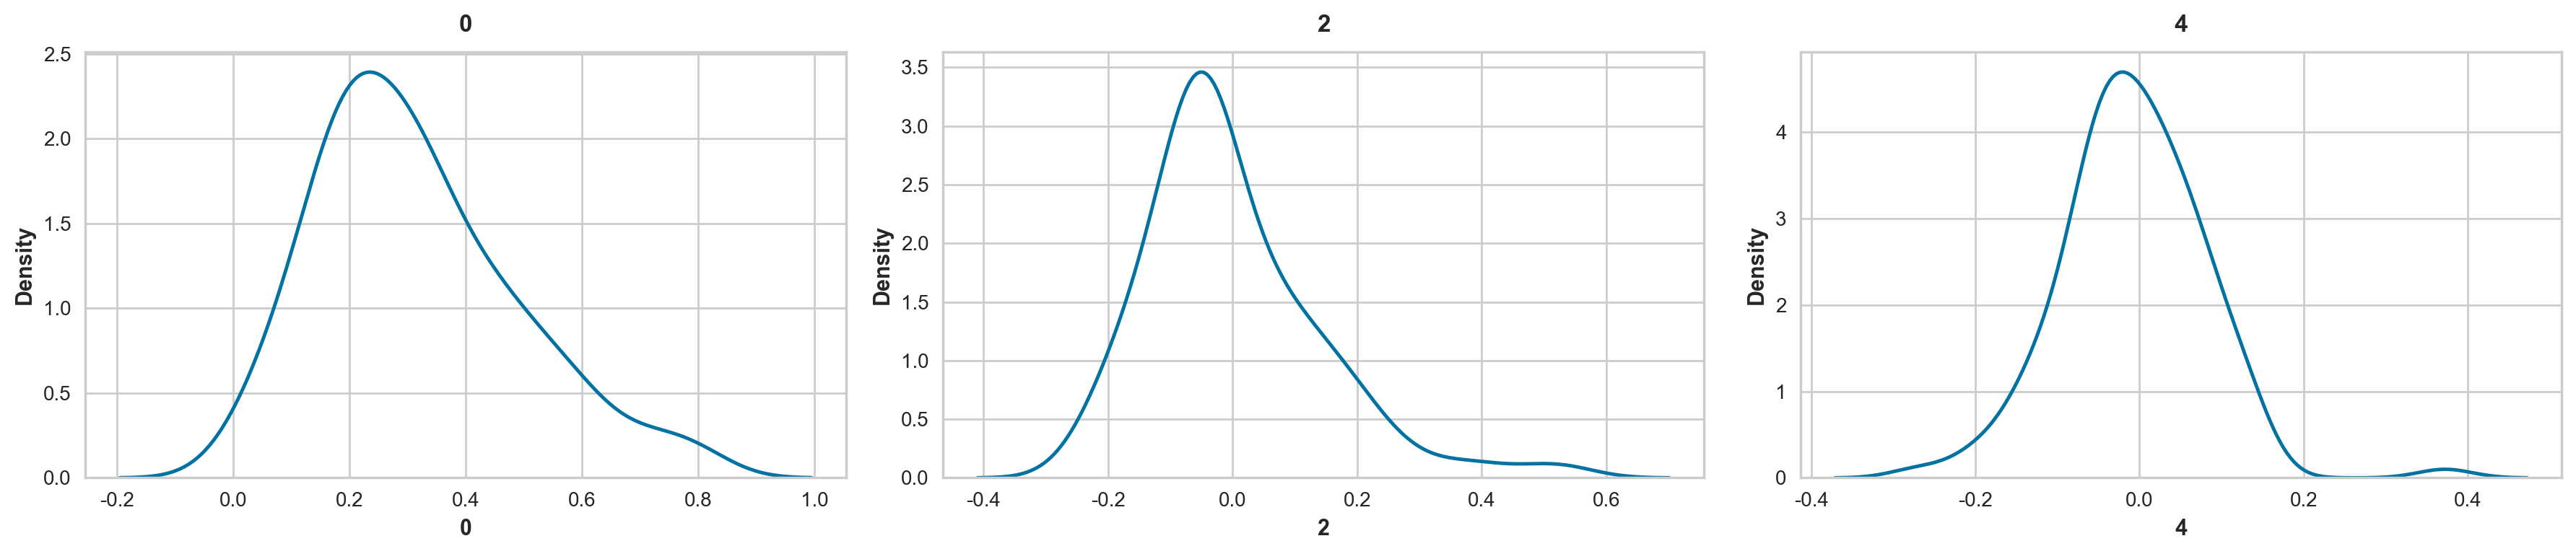

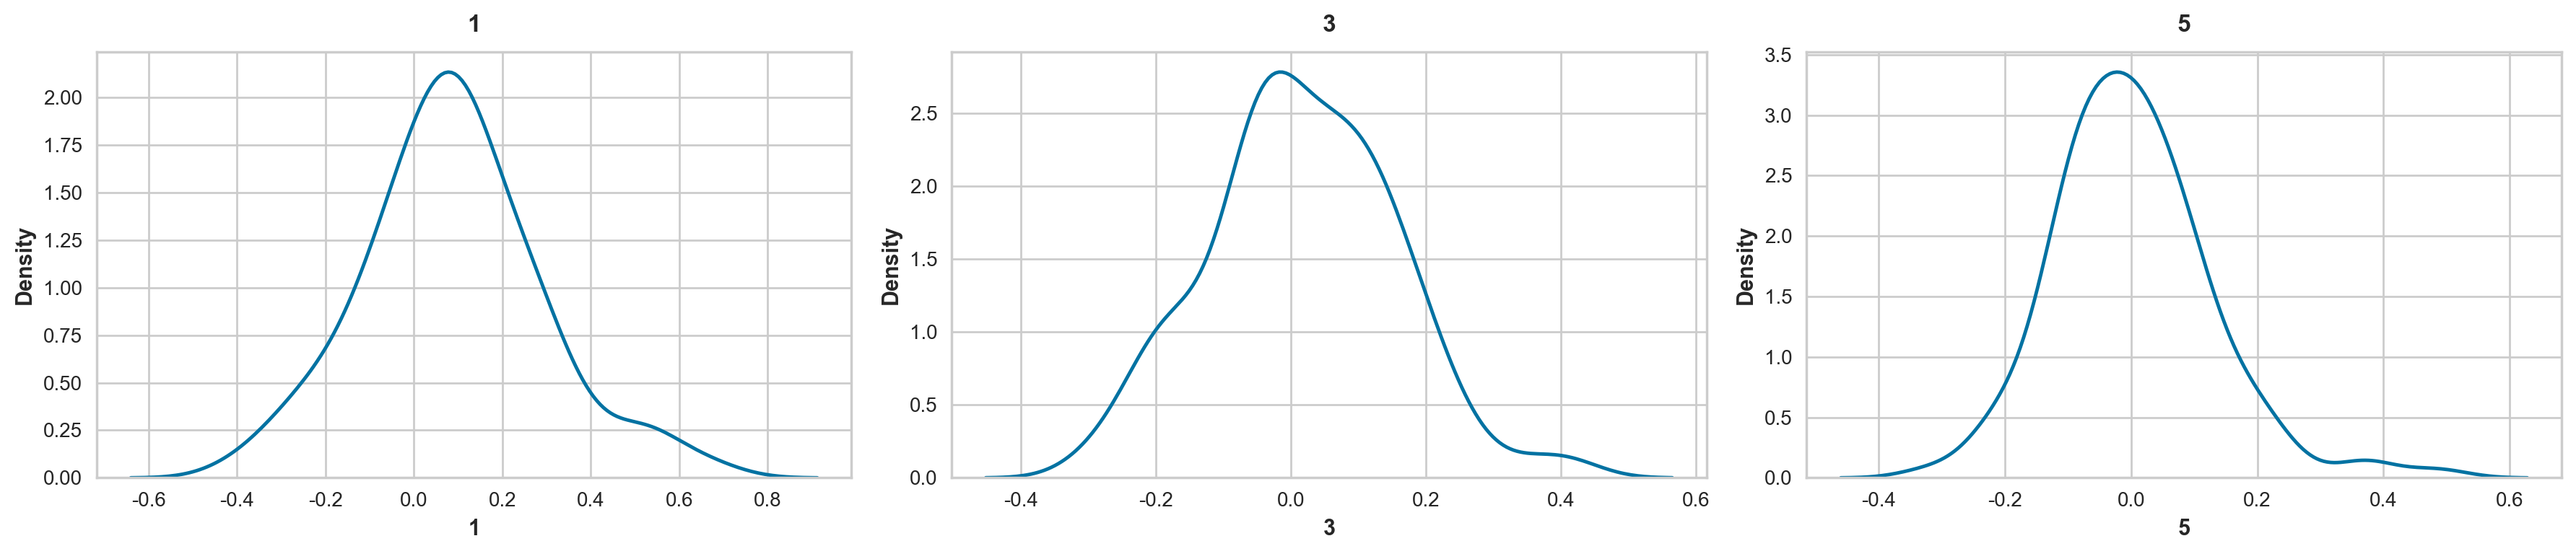

In [67]:
third_group = pca_result[pca_result['cluster'] == 2]

for row_num in range(2) :
    histplot(third_group.drop(['cluster'], axis = 1), row_num, 3)

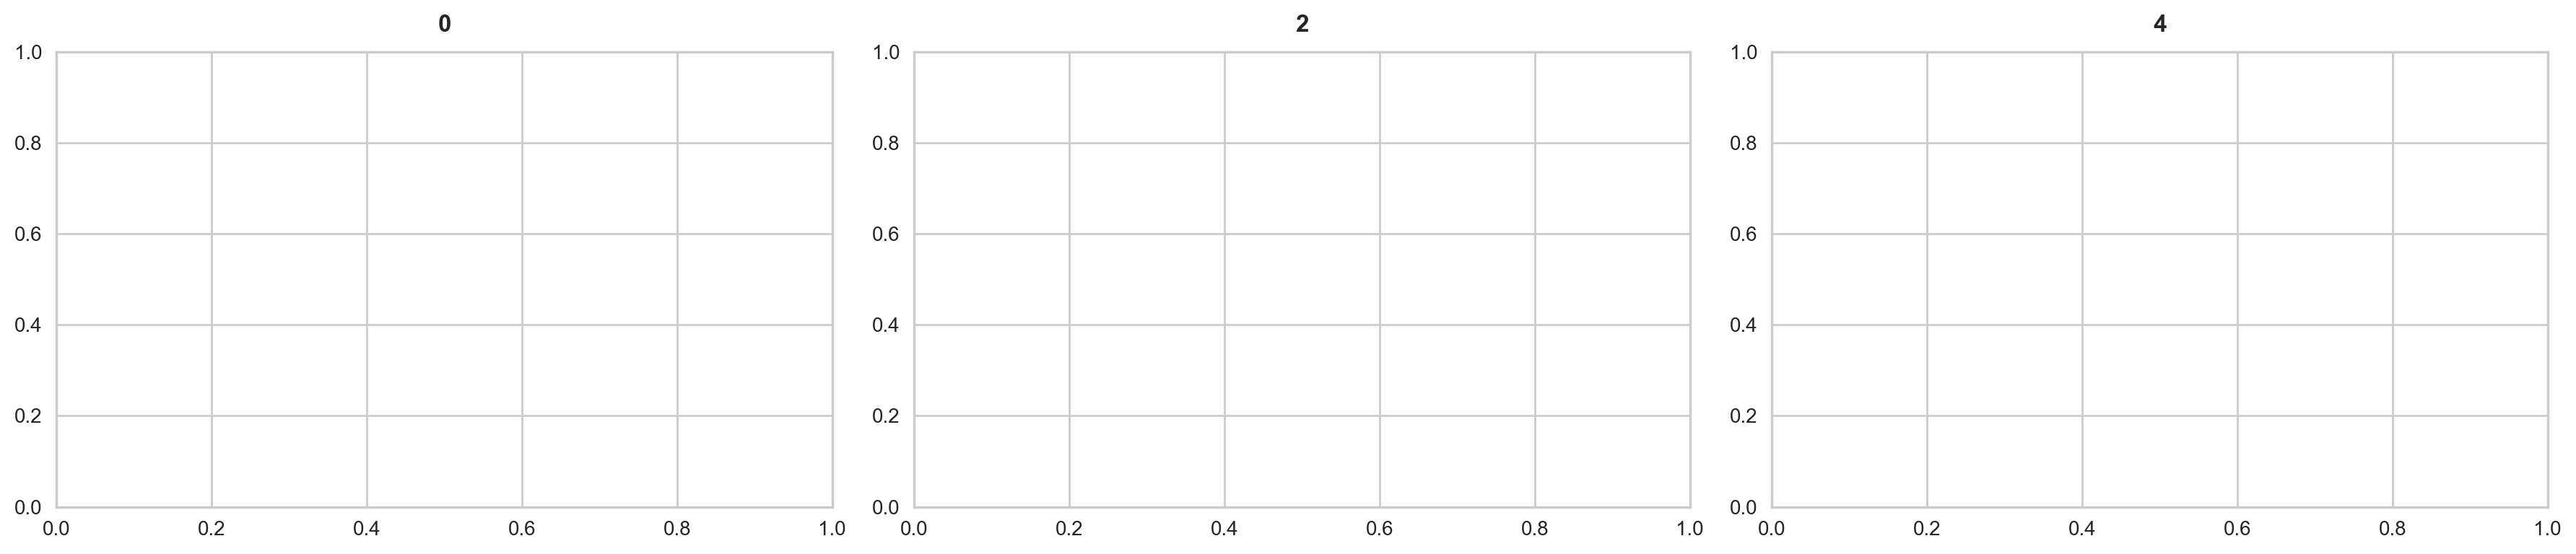

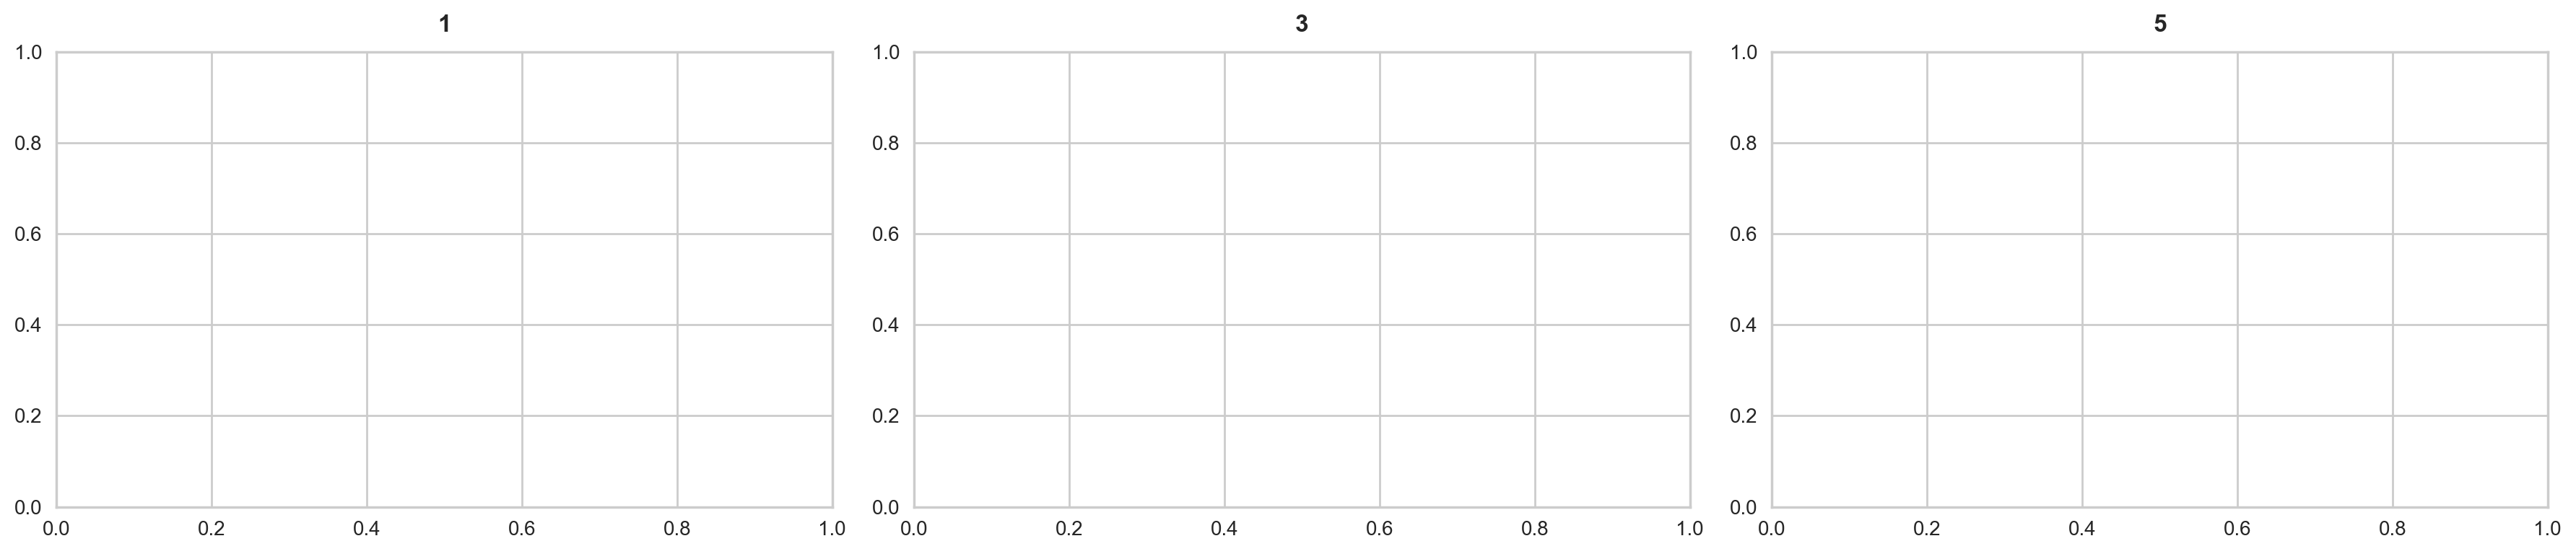

In [68]:
fourth_group = pca_result[pca_result['cluster'] == 3]

for row_num in range(2) :
    histplot(fourth_group.drop(['cluster'], axis = 1), row_num, 3)

clustering 결과 ->  classification -> feature importance 탐색

In [69]:
df_0 = cluster_0.copy()
df_0['cluster'] = 1

for i in [cluster_1, cluster_2, cluster_3]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_0 = pd.concat([df_0, tmp], axis=0)

In [70]:
df_1 = cluster_1.copy()
df_1['cluster'] = 1

for i in [cluster_0, cluster_2, cluster_3]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_1 = pd.concat([df_1, tmp], axis=0)

In [71]:
df_2 = cluster_2.copy()
df_2['cluster'] = 1

for i in [cluster_0, cluster_1, cluster_3]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_2 = pd.concat([df_2, tmp], axis=0)

In [72]:
df_3 = cluster_3.copy()
df_3['cluster'] = 1

for i in [cluster_0, cluster_1, cluster_2]:
    tmp = i.copy()
    tmp['cluster'] = 0
    df_3 = pd.concat([df_3, tmp], axis=0)

In [73]:
# print(df['Cluster'].value_counts())
# df['Binary Cluster 0'] = df['Cluster'].map({0:1, 1:0, 2:0})
# print("\n", df["Binary Cluster 0"].value_counts())

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(df_0[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_0["cluster"].values)

# 가장 중요한 피처의 인덱스 구하기
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# 가장 중요한 피처의 이름과 weight 구하기
most_important_features = np.take_along_axis(
    np.array(df_0.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('1인세대', 0.3293086569699454),
 ('총_20_30대', 0.2215652187363288),
 ('총_10대', 0.1232507682138789),
 ('인구수', 0.06960483274436854),
 ('미세먼지지수', 0.046342293279598754)]

In [75]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_1[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_1["cluster"].values)

# 가장 중요한 피처의 인덱스 구하기
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# 가장 중요한 피처의 이름과 weight 구하기
most_important_features = np.take_along_axis(
    np.array(df_1.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('인구수', 0.28145431109311),
 ('1인세대', 0.1552964330776813),
 ('총_20_30대', 0.13699433916861256),
 ('승하차인원_버스_지하철', 0.09732519774401956),
 ('카페수', 0.09201207597193009)]

In [76]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_2[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_2["cluster"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
    np.array(df_2.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('인구수', 0.5367570155192721),
 ('공원수', 0.08617645816738169),
 ('승하차인원_버스_지하철', 0.0772473256081665),
 ('총_10대', 0.050952396020692924),
 ('카페수', 0.04873986154925813)]

In [77]:
clf = RandomForestClassifier(random_state=1)
clf.fit(df_3[['미세먼지지수', '공원수', '도시농업(프로그램수)', '거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수',
       '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대', '총_20_30대',
       '총_60대이상', '1인세대']].values, df_3["cluster"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
    np.array(df_3.iloc[:, 0:-1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))[:5]

[('1인세대', 0.0),
 ('총_60대이상', 0.0),
 ('총_20_30대', 0.0),
 ('총_10대', 0.0),
 ('인구수', 0.0)]